# Importing Required Libraries 

In [1]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
# For loading .arff files
from scipy.io import arff
# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
from sklearn.impute import SimpleImputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
# Impoting classification models
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Importing Data

In [2]:
def import_data(i):
  df1.train=arff.loadarff('C:/Users/rick7/Desktop/Bankruptcy Prediction/'+str(i)+'year.arff')
  df1.train=pd.DataFrame(df1.train[0])
  return df1.train  

df1=pd.DataFrame()
df1=import_data(3)    

<ipython-input-2-997bd113e94a>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.train=arff.loadarff('C:/Users/rick7/Desktop/Bankruptcy Prediction/'+str(i)+'year.arff')


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [4]:
df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [51]:
df1_train,df1_test=train_test_split(df1,test_size=0.25,random_state=42,stratify=df1['class'])
df1_val, df1_test= train_test_split(df1_test, test_size=0.1/0.25,random_state=42,stratify=df1_test['class']) 


In [54]:
df1_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 5854 to 9052
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   1575 non-null   float64
 1   Attr2   1575 non-null   float64
 2   Attr3   1575 non-null   float64
 3   Attr4   1570 non-null   float64
 4   Attr5   1568 non-null   float64
 5   Attr6   1575 non-null   float64
 6   Attr7   1575 non-null   float64
 7   Attr8   1571 non-null   float64
 8   Attr9   1575 non-null   float64
 9   Attr10  1575 non-null   float64
 10  Attr11  1575 non-null   float64
 11  Attr12  1570 non-null   float64
 12  Attr13  1566 non-null   float64
 13  Attr14  1575 non-null   float64
 14  Attr15  1574 non-null   float64
 15  Attr16  1571 non-null   float64
 16  Attr17  1571 non-null   float64
 17  Attr18  1575 non-null   float64
 18  Attr19  1566 non-null   float64
 19  Attr20  1566 non-null   float64
 20  Attr21  1455 non-null   float64
 21  Attr22  1575 non-null   float64
 2

In [6]:
def response_to_int(df1_train):
 df1_train.iloc[:,-1]=pd.to_numeric(df1_train.iloc[:,-1])
 df1_train.info()
    
    
response_to_int(df1_test) 
response_to_int(df1_train)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 2717 to 9008
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   2101 non-null   float64
 1   Attr2   2101 non-null   float64
 2   Attr3   2101 non-null   float64
 3   Attr4   2096 non-null   float64
 4   Attr5   2095 non-null   float64
 5   Attr6   2101 non-null   float64
 6   Attr7   2101 non-null   float64
 7   Attr8   2097 non-null   float64
 8   Attr9   2101 non-null   float64
 9   Attr10  2101 non-null   float64
 10  Attr11  2101 non-null   float64
 11  Attr12  2096 non-null   float64
 12  Attr13  2093 non-null   float64
 13  Attr14  2101 non-null   float64
 14  Attr15  2100 non-null   float64
 15  Attr16  2097 non-null   float64
 16  Attr17  2097 non-null   float64
 17  Attr18  2101 non-null   float64
 18  Attr19  2093 non-null   float64
 19  Attr20  2093 non-null   float64
 20  Attr21  1952 non-null   float64
 21  Attr22  2101 non-null   float64
 2

P:\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [8]:
sum(df1_train['class']==0)


8006

In [55]:
print('Train DataSet Length=', len(df1_train), '\tCleaned Length=', len(df1_train.dropna(axis=0, how='any')), 
'\t Number of Missing Observations =', len(df1_train)-len(df1_train.dropna(axis=0, how='any')))
    
print('Test DataSet Length=', len(df1_test), '\tCleaned Length=', len(df1_test.dropna(axis=0, how='any')), 
'\t Number of Missing Observations =', len(df1_test)-len(df1_test.dropna(axis=0, how='any')))    

Train DataSet Length= 7877 	Cleaned Length= 3639 	 Number of Missing Observations = 4238
Test DataSet Length= 1051 	Cleaned Length= 519 	 Number of Missing Observations = 532


In [10]:
def drop_response(df1_train) :
 response=df1_train.iloc[:,-1]
 df1_train=df1_train.drop(labels='class',axis=1)

    

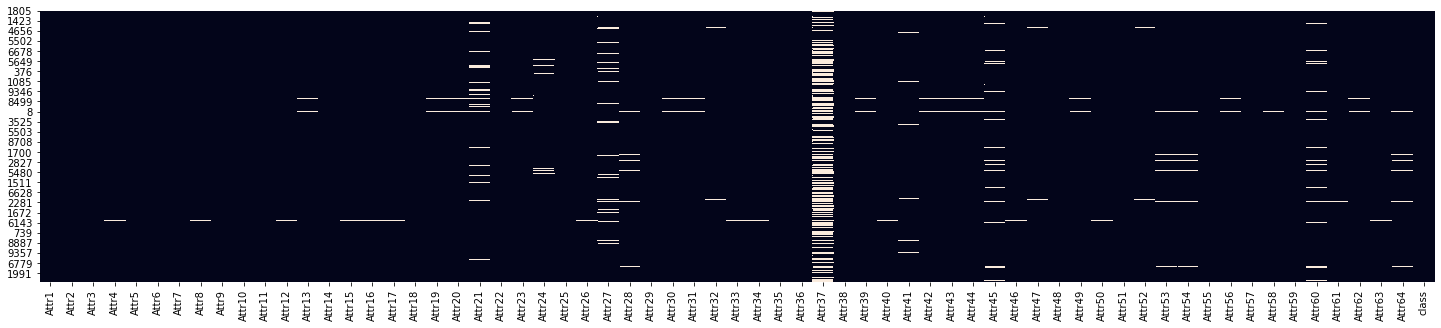

In [11]:
def sparasity_plot(df1_train): 
 fig, ax = plt.subplots(figsize=(25,5))
 sns.heatmap(df1_train.isnull(), cbar=False,ax=ax)
 
sparasity_plot(df1_train)

In [12]:
df1_train.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,8402.000000,8402.000000,8402.000000,8389.000000,8.383000e+03,8402.000000,8402.000000,8392.000000,8399.00000,8402.000000,...,8367.000000,8402.000000,8379.000000,8402.000000,7.926000e+03,8388.000000,8367.000000,8389.000000,8225.000000,8402.000000
mean,0.054847,0.588978,0.129347,11.308973,-1.764028e+03,-0.087670,0.067418,16.054715,1.82838,0.397535,...,-0.029447,0.032885,3.414699,1.660515,6.390950e+02,14.266036,277.043245,9.061467,38.013129,0.047132
std,0.705906,4.913137,4.905252,585.295212,1.323300e+05,5.471911,0.709017,675.340779,8.40540,4.915815,...,5.936958,20.490525,198.503181,86.322725,4.137726e+04,89.235008,7255.146439,29.760936,460.467365,0.211933
min,-17.692000,0.000000,-445.880000,0.002238,-1.190300e+07,-486.720000,-17.692000,-2.081800,-1.21570,-445.860000,...,-529.350000,-1667.300000,-198.690000,-172.070000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000691,0.255532,0.015534,1.036500,-5.222450e+01,0.000000,0.002069,0.432820,1.00920,0.297382,...,0.004887,0.007037,0.874940,0.000000,5.545975e+00,4.492450,40.635000,3.057300,1.997600,0.000000
50%,0.042716,0.463860,0.197595,1.606600,1.778200e+00,0.000000,0.050569,1.109750,1.19210,0.515275,...,0.052046,0.104760,0.952930,0.003126,9.958200e+00,6.690100,70.494000,5.151600,4.021600,0.000000
75%,0.123448,0.689250,0.420228,2.953800,5.606300e+01,0.072553,0.140813,2.824825,2.05715,0.724808,...,0.131285,0.270845,0.996080,0.248650,2.093375e+01,10.636250,118.490000,8.921600,9.690000,0.000000
max,52.652000,446.880000,17.708000,53433.000000,6.837700e+05,45.533000,52.652000,53432.000000,740.44000,11.837000,...,2.763300,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,501840.000000,1974.500000,21499.000000,1.000000


# Data Standardization

In [7]:
def stand(df):
 # define standard scaler
 scaler = StandardScaler()
 # transform data
 scaled = scaler.fit_transform(df)
 scaled=pd.DataFrame(scaled)
 labels=[]
 for i in range(1,66):
    if(i!=65):
     labels.append("Attr"+str(i))
    else:
     labels.append('class')
 response = df1_train['class'].astype(np.int64)  
 scaled.columns=labels
 i=scaled.loc[scaled['class']>0]['class'].index
 scaled.loc[i,'class']=scaled.loc[i,'class']/4
 scaled.loc[:,'class']=scaled.loc[:,'class'].astype(np.int64)

 return scaled


In [61]:
df1_train_scaled=stand(df1_train)
df1_val_scaled=stand(df1_val)
df1_test_scaled=stand(df1_test)

In [9]:
sum(df1_test_scaled['class']==0) #To check

2002

# Data Imputation

Mean Imputation

In [62]:
def mean_imputation(df1_train): 
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imputed_df = pd.DataFrame(imputer.fit_transform(df1_train)) 
    mean_imputed_df.columns=df1_train.columns
    return mean_imputed_df
    
mean_imputed_df_train=mean_imputation(df1_train_scaled)
mean_imputed_df_val=mean_imputation(df1_val_scaled)
mean_imputed_df_test=mean_imputation(df1_test_scaled)


 KNN Imputation

In [39]:
def knn_imputation(df1_train):
    knn_imputed_dataset = fancyimpute.KNN(k=100,verbose=True).fit_transform(df1_train)
    knn_imputed_df=pd.DataFrame(data=knn_imputed_dataset)
    return knn_imputed_df
    
knn_imputed_df_train=knn_imputation(df1_train_scaled)   
knn_imputed_df_test=knn_imputation(df1_test_scaled)

Imputing row 1/8402 with 1 missing, elapsed time: 39.200
Imputing row 101/8402 with 0 missing, elapsed time: 39.234
Imputing row 201/8402 with 1 missing, elapsed time: 39.243
Imputing row 301/8402 with 0 missing, elapsed time: 39.251
Imputing row 401/8402 with 0 missing, elapsed time: 39.258
Imputing row 501/8402 with 0 missing, elapsed time: 39.266
Imputing row 601/8402 with 0 missing, elapsed time: 39.273
Imputing row 701/8402 with 0 missing, elapsed time: 39.278
Imputing row 801/8402 with 0 missing, elapsed time: 39.287
Imputing row 901/8402 with 1 missing, elapsed time: 39.294
Imputing row 1001/8402 with 2 missing, elapsed time: 39.301
Imputing row 1101/8402 with 2 missing, elapsed time: 39.309
Imputing row 1201/8402 with 5 missing, elapsed time: 39.316
Imputing row 1301/8402 with 0 missing, elapsed time: 39.322
Imputing row 1401/8402 with 0 missing, elapsed time: 39.332
Imputing row 1501/8402 with 0 missing, elapsed time: 39.342
Imputing row 1601/8402 with 0 missing, elapsed time:

In [40]:
labels=[]
for i in range(1,66):
    if(i!=65):
     labels.append("Attr"+str(i))
    else:
     labels.append('class')
    
knn_imputed_df_train.columns=labels
knn_imputed_df_test.columns=labels
knn_imputed_df_train.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.009136,0.044060,-0.023776,-0.017587,0.012771,0.016023,-0.008635,-0.023416,0.162110,-0.041293,...,0.007313,0.013771,-0.012260,-0.019237,-0.015328,0.320285,-0.025674,-0.169389,-0.046766,0.0
1,-0.302844,0.158568,-0.101395,-0.018074,0.008621,-0.108234,-0.319247,-0.024173,-0.008267,-0.155736,...,0.105909,0.019472,-0.015106,-0.019237,-0.015352,-0.106095,0.000941,-0.261286,-0.016468,0.0
2,-0.044806,0.069361,-0.009242,-0.017449,0.012753,0.008465,-0.053644,-0.023662,-0.037178,-0.066579,...,0.007620,0.014524,-0.012260,-0.010607,-0.015355,-0.128932,-0.009393,-0.245782,-0.014508,0.0
3,-0.028218,-0.039600,-0.007837,-0.017196,0.012430,0.016023,-0.045826,-0.021501,-0.130134,0.042322,...,0.010132,0.001210,-0.012396,-0.019237,-0.015389,-0.099410,-0.012731,-0.238080,-0.079589,0.0
4,-0.104057,0.087673,-0.044439,-0.017763,0.012500,0.016023,-0.121332,-0.023803,-0.006280,-0.084883,...,0.003796,0.044461,-0.012113,-0.020600,-0.015350,-0.115056,-0.009412,-0.245742,-0.029761,0.0


In [41]:
knn_imputed_df_train.isnull().sum().sum()

0

MICE Imputation

In [42]:
def mice_imputation(df1_train):
    mice_imputed_dataset = fancyimpute.IterativeImputer(verbose=True,max_iter=100,tol=0.01).fit_transform(df1_train)
    mice_imputed_df=pd.DataFrame(data=mice_imputed_dataset)  
    return mice_imputed_df
    


In [43]:
mice_imputed_df_train=mice_imputation(df1_train_scaled.iloc[:,:-1])

[IterativeImputer] Completing matrix with shape (8402, 64)
[IterativeImputer] Change: 2354.0504907657614, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 1577.3659903441526, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 919.2456303804995, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 554.5785143855168, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 326.5443318038552, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 192.2944348443667, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 113.34722115318401, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 66.70409624547095, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 39.49515187347934, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 23.61978040876983, scaled tolerance: 0.9147375367136575 
[IterativeImputer] Change: 14.294325542486137, scaled tolerance: 0.9147375367136575 
[IterativeImp

P:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [44]:
mice_imputed_df_test=mice_imputation(df1_test_scaled.iloc[:,:-1])

[IterativeImputer] Completing matrix with shape (2101, 64)
[IterativeImputer] Change: 438.09611079431085, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 287.28834954309445, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 122.85466675465615, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 83.9910599894613, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 37.07068035144622, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 12.05125410380262, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 2.901366186540069, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 2.4060641724286973, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 2.132884911983211, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 1.932808983834191, scaled tolerance: 0.4578464322505482 
[IterativeImputer] Change: 1.794765787026566, scaled tolerance: 0.4578464322505482 
[IterativeImpu

P:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [45]:
mice_imputed_df_test['class']=df1_test_scaled['class']
mice_imputed_df_train['class']=df1_train_scaled['class']


In [46]:
mice_imputed_df_train.columns=labels
mice_imputed_df_test.columns=labels
mice_imputed_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   2101 non-null   float64
 1   Attr2   2101 non-null   float64
 2   Attr3   2101 non-null   float64
 3   Attr4   2101 non-null   float64
 4   Attr5   2101 non-null   float64
 5   Attr6   2101 non-null   float64
 6   Attr7   2101 non-null   float64
 7   Attr8   2101 non-null   float64
 8   Attr9   2101 non-null   float64
 9   Attr10  2101 non-null   float64
 10  Attr11  2101 non-null   float64
 11  Attr12  2101 non-null   float64
 12  Attr13  2101 non-null   float64
 13  Attr14  2101 non-null   float64
 14  Attr15  2101 non-null   float64
 15  Attr16  2101 non-null   float64
 16  Attr17  2101 non-null   float64
 17  Attr18  2101 non-null   float64
 18  Attr19  2101 non-null   float64
 19  Attr20  2101 non-null   float64
 20  Attr21  2101 non-null   float64
 21  Attr22  2101 non-null   float64
 22  

# Handling Data Imbalance using SMOTE

In [150]:
def balanced_data(df,ratio):
    y_train=df.iloc[:,-1]
    x_train=df.iloc[:,:-1]
    sm = ADASYN(random_state = 2,sampling_strategy=ratio)
    df1_train_res, y_train_res = sm.fit_sample(x_train, y_train)
    return df1_train_res,y_train_res

In [56]:
from imblearn.over_sampling import ADASYN

In [58]:
mean_imputed_df_balanced,y_balanced3=balanced_data(mean_imputed_df_train)

In [63]:
mean_imputed_df_balanced_val,y_balanced3_val=balanced_data(mean_imputed_df_val)

In [64]:
mean_imputed_df_balanced_test,y_balanced3_test=balanced_data(mean_imputed_df_test)

In [48]:
mice_imputed_df_balanced,y_balanced1=balanced_data(mice_imputed_df_train)
knn_imputed_df_balanced,y_balanced2=balanced_data(knn_imputed_df_train)
mean_imputed_df_balanced,y_balanced3=balanced_data(mean_imputed_df_train)
print('After OverSampling, the shape of mice_imputed_df: {}'.format(mice_imputed_df_train.shape))
print('After OverSampling, the shape of knn_imputed_df: {}'.format(knn_imputed_df_train.shape))
print('After OverSampling, the shape of mean_imputed_df: {}'.format(mean_imputed_df_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced1.shape))
  
print("After OverSampling, counts of label '1' in Mice Imputed df: {}".format(sum(y_balanced1 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced1 == 0)))

print("After OverSampling, counts of label '1' in Knn Imputed df: {}".format(sum(y_balanced2 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced2 == 0)))

print("After OverSampling, counts of label '1' in Mean Imputed df: {}".format(sum(y_balanced3 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced3 == 0)))

After OverSampling, the shape of mice_imputed_df: (8402, 65)
After OverSampling, the shape of knn_imputed_df: (8402, 65)
After OverSampling, the shape of mean_imputed_df: (8402, 65)
After OverSampling, the shape of train_y: (16012,) 

After OverSampling, counts of label '1' in Mice Imputed df: 8006
After OverSampling, counts of label '0': 8006
After OverSampling, counts of label '1' in Knn Imputed df: 8006
After OverSampling, counts of label '0': 8006
After OverSampling, counts of label '1' in Mean Imputed df: 8006
After OverSampling, counts of label '0': 8006


In [49]:
mice_imputed_df_balanced_test,y_balanced1_test=balanced_data(mice_imputed_df_test)
knn_imputed_df_balanced_test,y_balanced2_test=balanced_data(knn_imputed_df_test)
mean_imputed_df_balanced_test,y_balanced3_test=balanced_data(mean_imputed_df_test)

In [50]:
mice_imputed_df_balanced_test.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.021195,-0.018291,0.007223,-0.124372,-0.023005,0.033637,0.024844,-0.035387,0.113277,0.019821,...,-0.113887,0.020382,0.039483,-0.030256,-0.004817,-0.038437,0.171303,0.008735,-0.087601,-0.089674
1,-0.144941,-0.033177,0.021129,-0.107694,-0.019239,0.021543,-0.174797,-0.034724,-0.353552,0.029419,...,-0.015549,0.020363,0.024812,-0.030090,-0.049566,-0.038424,-0.132889,0.009573,-0.157094,-0.094210
2,-0.138871,-0.013065,0.012773,-0.122244,-0.019775,0.021711,-0.172395,-0.035576,0.933716,0.014594,...,-0.115339,0.020232,0.025238,-0.030060,-0.056708,-0.031601,-0.108218,0.008604,-0.065792,-0.058998
3,-0.899060,0.000328,-0.003833,-0.132159,-0.024495,0.022988,-0.922784,-0.035934,-0.212108,0.001186,...,-0.119264,0.018242,-0.094681,-0.030433,-0.071110,-0.038856,-0.126532,0.010994,-0.195367,-0.089579
4,-0.129732,-0.051662,0.020413,-0.097925,-0.019446,0.022988,-0.153188,-0.031765,-0.156885,0.053193,...,-0.102218,0.020427,0.025721,-0.030093,-0.071110,-0.038093,-0.100824,0.008557,-0.056557,-0.093325


# Checking Multicollinearity

In [51]:
corr1=mean_imputed_df_balanced.corr()
corr2=knn_imputed_df_balanced.corr()
corr3=mice_imputed_df_balanced.corr()

Text(0.5, 1.0, 'Correlation HeatMap for Mean Imputed DataSet')

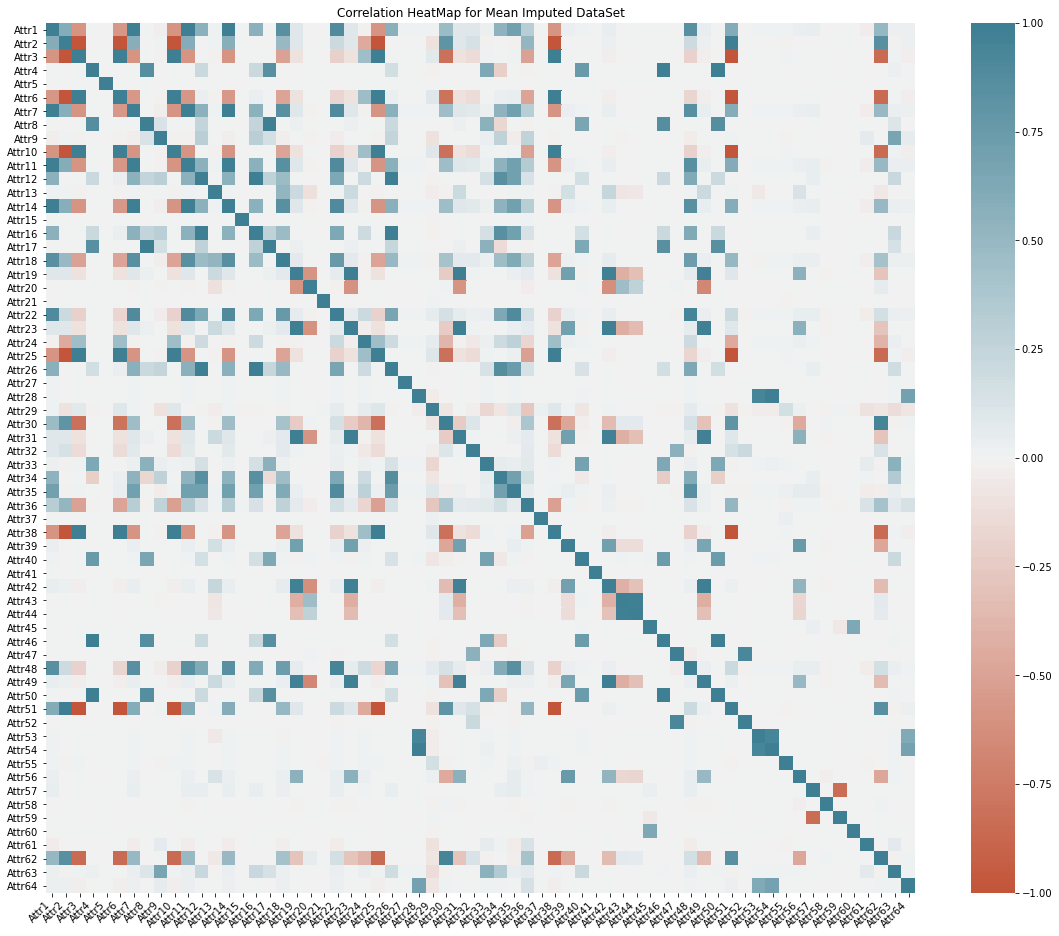

In [52]:
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
ax = sns.heatmap(
    corr1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation HeatMap for Mean Imputed DataSet')

Text(0.5, 1.0, 'Correlation HeatMap for KNN Imputed DataSet')

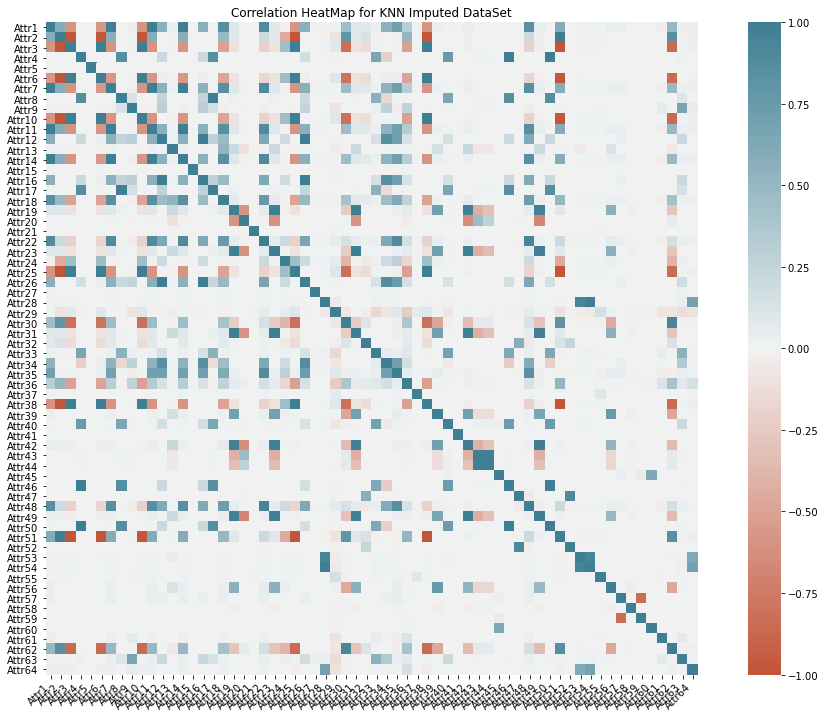

In [59]:
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
ax = sns.heatmap(
    corr2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation HeatMap for KNN Imputed DataSet')

Text(0.5, 1.0, 'Correlation HeatMap for MICE Imputed DataSet')

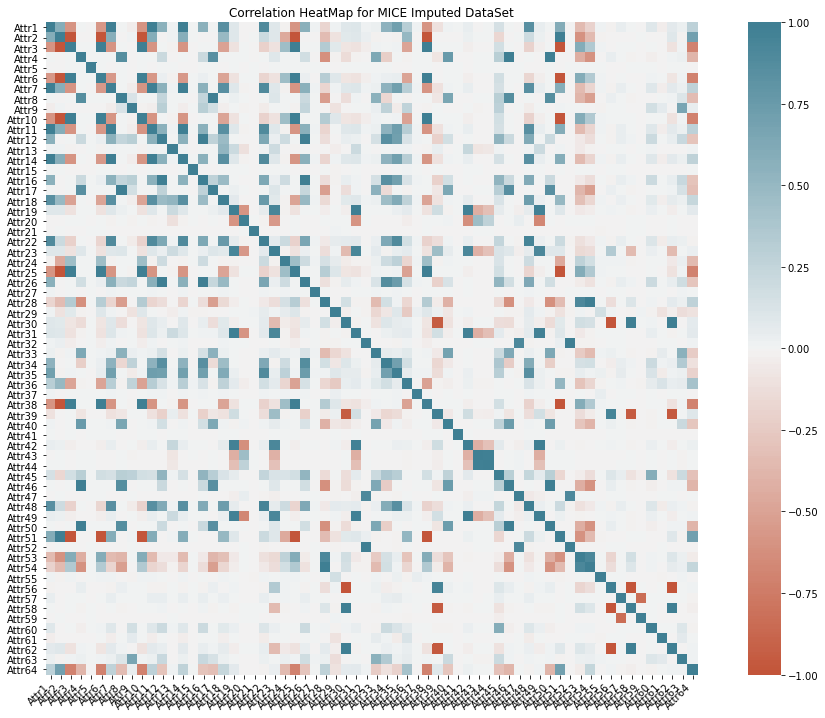

In [60]:
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
ax = sns.heatmap(
    corr3, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation HeatMap for MICE Imputed DataSet')

# Computing VIF

In [61]:
Z1=pd.DataFrame(add_constant(mean_imputed_df_balanced))
Z2=add_constant(knn_imputed_df_balanced)
Z3=add_constant(mice_imputed_df_balanced)


In [62]:
Z1

,const,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,1.0,0.009136,0.044060,-0.023776,-0.017587,0.012771,0.016023,-0.008635,-0.023416,0.162110,...,-0.107653,0.007313,0.013771,-0.012260,-0.019237,-0.015328,0.320285,-0.025674,-0.169389,-4.676648e-02
1,1.0,-0.302844,0.158568,-0.101395,-0.018074,0.008621,-0.108234,-0.319247,-0.024173,-0.008267,...,-0.110570,0.105909,0.019472,-0.015106,-0.019237,-0.015352,-0.106095,0.000941,-0.261286,3.887468e-18
2,1.0,-0.044806,0.069361,-0.009242,-0.017449,0.012753,0.008465,-0.053644,-0.023662,-0.037178,...,-0.080205,0.007620,0.014524,-0.012260,-0.010607,-0.015355,-0.128932,-0.009393,-0.245782,-1.450816e-02
3,1.0,-0.028218,-0.039600,-0.007837,-0.017196,0.012430,0.016023,-0.045826,-0.021501,-0.130134,...,-0.095742,0.010132,0.001210,-0.012396,-0.019237,-0.015389,-0.099410,-0.012731,-0.238080,-7.958948e-02
4,1.0,-0.104057,0.087673,-0.044439,-0.017763,0.012500,0.016023,-0.121332,-0.023803,-0.006280,...,-0.119587,0.003796,0.044461,-0.012113,-0.020600,-0.015350,-0.115056,-0.009412,-0.245742,-2.976098e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16007,1.0,0.102186,-0.012043,0.031581,-0.016449,0.013551,0.039229,0.125378,-0.022939,-0.089953,...,0.340355,0.016248,0.020623,-0.012503,-0.016947,-0.014969,-0.111412,-0.024147,-0.146515,-5.895125e-02
16008,1.0,-0.065525,0.028729,0.026344,-0.016960,0.013306,-0.022324,-0.076606,-0.023190,0.212112,...,-0.063341,0.002533,0.001033,-0.012209,-0.019237,-0.014216,-0.099774,-0.027435,-0.129295,4.009669e-01
16009,1.0,0.061463,-0.102202,0.092507,-0.006070,0.014026,0.033976,0.051243,-0.008703,-0.089869,...,0.259217,0.016030,0.003740,-0.012496,-0.019236,-0.015300,-0.102502,-0.035169,0.255547,-7.266913e-02
16010,1.0,-0.060358,0.026477,-0.011589,-0.017177,0.013537,0.016023,-0.073053,-0.023189,-0.156423,...,-0.060733,0.004209,0.000597,-0.012659,-0.009203,-0.014875,-0.106162,-0.009372,-0.243126,-8.076855e-02


In [63]:
def vif(Z3):    
    vif_data = pd.DataFrame()
    vif_data["feature"] = Z3.columns

        # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i)
                              for i in range(len(Z3.columns))]

    return vif_data
  

In [64]:
vif_mean=vif(mean_imputed_df_balanced)
vif_knn=vif(knn_imputed_df_balanced)
vif_mice=vif(mice_imputed_df_balanced)

P:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [65]:
vif_mean.sort_values(by=['VIF'],ascending=False)


,feature,VIF
17,Attr18,inf
6,Attr7,inf
13,Attr14,inf
42,Attr43,9.918403e+10
43,Attr44,8.425739e+10
...,...,...
26,Attr27,1.002918e+00
14,Attr15,1.002749e+00
20,Attr21,1.001218e+00
40,Attr41,1.000434e+00


In [58]:
vif_knn.sort_values(by=['VIF'],ascending=False)


,feature,VIF
17,Attr18,inf
6,Attr7,inf
13,Attr14,inf
42,Attr43,1.108824e+11
43,Attr44,9.404443e+10
...,...,...
26,Attr27,1.003578e+00
20,Attr21,1.001957e+00
14,Attr15,1.001851e+00
40,Attr41,1.000534e+00


In [66]:
vif_mice.sort_values(by=['VIF'],ascending=False)


,feature,VIF
6,Attr7,inf
13,Attr14,inf
17,Attr18,inf
42,Attr43,1.031374e+11
43,Attr44,8.761611e+10
...,...,...
26,Attr27,1.002974e+00
14,Attr15,1.002687e+00
20,Attr21,1.001308e+00
40,Attr41,1.000492e+00


# Iterative VIF Elimination Procedure

In [67]:
def vif_func(X,thresh=10):
    var_names=X.columns
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    Y=X
# calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    vif_max=vif_data['VIF'].max()
    vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
    
    if(vif_max<=thresh):
        print("All Variables have VIF <",thresh," Max VIF is ",vif_max)
        return var_names
    else:
       while(vif_max>thresh):
           X=X.drop(vif_features_max, inplace=False, axis=1) 
           print("\n Dropped Features",list(vif_features_max),"\n Max VIF was",vif_max)
           var_names=X.columns
           vif_data = pd.DataFrame()
           vif_data["feature"] = X.columns
           vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
           vif_max=vif_data['VIF'].max()
           vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
           
           if(vif_max<=thresh):
            print("All Variables have VIF <",thresh," Max VIF is ",vif_max)
            break
     
    return X.columns
   
    

In [68]:
#Don't run, takes time unless you need to!
col_mean=vif_func(Z1,5)[1:]
col_knn=vif_func(Z2,5)[1:]
col_mice=vif_func(Z3,5)[1:]

P:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



 Dropped Features ['Attr7', 'Attr14', 'Attr18'] 
 Max VIF was inf

 Dropped Features ['Attr43'] 
 Max VIF was 99198229677.76424

 Dropped Features ['Attr17'] 
 Max VIF was 90862.6491291998

 Dropped Features ['Attr19'] 
 Max VIF was 11758.582858795868

 Dropped Features ['Attr16'] 
 Max VIF was 11345.790558023062

 Dropped Features ['Attr10'] 
 Max VIF was 10458.37854718111

 Dropped Features ['Attr4'] 
 Max VIF was 7540.988670626193

 Dropped Features ['Attr51'] 
 Max VIF was 3335.1325747266674

 Dropped Features ['Attr42'] 
 Max VIF was 2184.9853287943715

 Dropped Features ['Attr38'] 
 Max VIF was 1627.133410692013

 Dropped Features ['Attr23'] 
 Max VIF was 1390.6620575515021

 Dropped Features ['Attr2'] 
 Max VIF was 1045.1536755524517

 Dropped Features ['Attr46'] 
 Max VIF was 638.9726420873458

 Dropped Features ['Attr25'] 
 Max VIF was 429.300323001772

 Dropped Features ['Attr54'] 
 Max VIF was 229.8054851871444

 Dropped Features ['Attr3'] 
 Max VIF was 195.896085515913

 D

P:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



 Dropped Features ['Attr7', 'Attr14', 'Attr18'] 
 Max VIF was inf

 Dropped Features ['Attr43'] 
 Max VIF was 99313074091.63672

 Dropped Features ['Attr17'] 
 Max VIF was 90824.45844481561

 Dropped Features ['Attr19'] 
 Max VIF was 11752.339662929407

 Dropped Features ['Attr16'] 
 Max VIF was 11346.173259295429

 Dropped Features ['Attr10'] 
 Max VIF was 10457.557041443071

 Dropped Features ['Attr4'] 
 Max VIF was 7564.2156916977

 Dropped Features ['Attr51'] 
 Max VIF was 3336.2272222156807

 Dropped Features ['Attr42'] 
 Max VIF was 2186.2803716236344

 Dropped Features ['Attr38'] 
 Max VIF was 1628.0126307731523

 Dropped Features ['Attr23'] 
 Max VIF was 1391.8632281057116

 Dropped Features ['Attr2'] 
 Max VIF was 1046.1801602979524

 Dropped Features ['Attr46'] 
 Max VIF was 641.1737689398424

 Dropped Features ['Attr25'] 
 Max VIF was 429.74687542544916

 Dropped Features ['Attr54'] 
 Max VIF was 230.26522212393039

 Dropped Features ['Attr3'] 
 Max VIF was 196.407222317039

P:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



 Dropped Features ['Attr7', 'Attr14', 'Attr18'] 
 Max VIF was inf

 Dropped Features ['Attr43'] 
 Max VIF was 103223727692.7422

 Dropped Features ['Attr32'] 
 Max VIF was 143456.16386818

 Dropped Features ['Attr17'] 
 Max VIF was 97573.68960836386

 Dropped Features ['Attr56'] 
 Max VIF was 27653.75968004387

 Dropped Features ['Attr16'] 
 Max VIF was 13066.998567704035

 Dropped Features ['Attr19'] 
 Max VIF was 11275.839991180235

 Dropped Features ['Attr10'] 
 Max VIF was 10504.889540562235

 Dropped Features ['Attr62'] 
 Max VIF was 10356.85087159006

 Dropped Features ['Attr4'] 
 Max VIF was 7620.953039930257

 Dropped Features ['Attr51'] 
 Max VIF was 3211.2494496756376

 Dropped Features ['Attr42'] 
 Max VIF was 2292.469038146789

 Dropped Features ['Attr30'] 
 Max VIF was 1953.3760377147444

 Dropped Features ['Attr38'] 
 Max VIF was 1621.6190855191605

 Dropped Features ['Attr23'] 
 Max VIF was 1567.2037884267374

 Dropped Features ['Attr2'] 
 Max VIF was 1031.397123764891


In [70]:
rem_var=pd.DataFrame()
rem_var['Mean Imputation']=col_mean
rem_var['KNN Imputation']=col_knn
rem_var1=pd.DataFrame(col_mice)

remaining_variables = pd.concat([rem_var, rem_var1], axis=1)
remaining_variables.columns=['Mean Imputation','KNN Imputation','MICE Imputation']
remaining_variables             #Variables Remaining in Each  DataFrame after Iterative VIF Elimination Method


,Mean Imputation,KNN Imputation,MICE Imputation
0,Attr5,Attr5,Attr5
1,Attr6,Attr6,Attr8
2,Attr8,Attr8,Attr9
3,Attr9,Attr9,Attr13
4,Attr13,Attr13,Attr15
5,Attr15,Attr15,Attr20
6,Attr20,Attr20,Attr21
7,Attr21,Attr21,Attr24
8,Attr24,Attr24,Attr27
9,Attr27,Attr27,Attr28


# Exporting to R For Variance Decomposition Analysis and Variable Selection

In [85]:
def file_export(Z1,col,y_balanced,location): 
    mean_df=Z1[col]
    mean_df['response']=y_balanced
    mean_df['response']=mean_df['response'].astype(int)
    mean_df.to_csv(location)
    
file_export(Z1,col_mean,y_balanced3,'C:/Users/rick7/Desktop/mean.csv')
file_export(Z2,col_knn,y_balanced2,'C:/Users/rick7/Desktop/knn.csv')
file_export(Z1,col_mice,y_balanced1,'C:/Users/rick7/Desktop/mice.csv')




<ipython-input-85-f416dd80e494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df['response']=y_balanced
<ipython-input-85-f416dd80e494>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df['response']=mean_df['response'].astype(int)


In [140]:
file_export(mice_imputed_df_balanced,mice_imputed_df_balanced.columns,y_balanced1,'C:/Users/rick7/Desktop/micefull.csv')

file_export(knn_imputed_df_balanced,knn_imputed_df_balanced.columns,y_balanced2,'C:/Users/rick7/Desktop/knnfull.csv')

file_export(mean_imputed_df_balanced,mean_imputed_df_balanced.columns,y_balanced3,'C:/Users/rick7/Desktop/meanfull.csv')


In [250]:
file_export(mice_imputed_df_balanced_test,mice_imputed_df_balanced.columns,y_balanced1_test,'C:/Users/rick7/Desktop/micefulltest.csv')

file_export(knn_imputed_df_balanced_test,knn_imputed_df_balanced.columns,y_balanced2_test,'C:/Users/rick7/Desktop/knnfulltest.csv')

file_export(mean_imputed_df_balanced_test,mean_imputed_df_balanced.columns,y_balanced3_test,'C:/Users/rick7/Desktop/meanfulltest.csv')

In [88]:
mean_decomp=pd.read_csv('C:/Users/rick7/Desktop/Mean_Decomp.csv')
knn_decomp=pd.read_csv('C:/Users/rick7/Desktop/KNN_Decomp.csv')
mice_decomp=pd.read_csv('C:/Users/rick7/Desktop/MICE_Decomp.csv')
   

,cond.index,Attr5,Attr6,Attr8,Attr9,Attr13,Attr15,Attr20,Attr21,Attr24,...,Attr53,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
0,1.0000,0.0000,0.3759,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0051,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.6884,0.0000,0.0302,0.0017,0.0295,0.0001,0.0000,0.0002,0.0000,0.0109,...,0.0015,0.0012,0.0002,0.0009,0.0000,0.0004,0.0000,0.0047,0.0410,0.0044
2,1.8638,0.0000,0.0082,0.0106,0.0009,0.0008,0.0000,0.0002,0.0000,0.0200,...,0.0008,0.0100,0.0062,0.0068,0.0002,0.0038,0.0000,0.0031,0.0006,0.0016
3,1.9174,0.0000,0.0004,0.0001,0.0008,0.0003,0.0000,0.0001,0.0000,0.0019,...,0.0001,0.0008,0.0014,0.0823,0.0000,0.0633,0.0004,0.0001,0.0015,0.0001
4,1.9658,0.0000,0.0169,0.0769,0.0017,0.0008,0.0002,0.0000,0.0000,0.0003,...,0.0050,0.0082,0.0041,0.0006,0.0001,0.0005,0.0000,0.0016,0.0137,0.0093
5,1.9888,0.0000,0.0031,0.0006,0.0003,0.0281,0.0001,0.0074,0.0000,0.0010,...,0.0004,0.0026,0.0831,0.0000,0.0005,0.0001,0.0000,0.0010,0.0021,0.0013
6,2.1079,0.0000,0.0003,0.0047,0.0043,0.0026,0.0000,0.0002,0.0000,0.0014,...,0.1559,0.0043,0.0000,0.0000,0.0000,0.0000,0.0005,0.0023,0.0042,0.1716
7,2.1887,0.0000,0.0000,0.0000,0.0029,0.0001,0.0000,0.0000,0.0000,0.0012,...,0.0013,0.0012,0.0000,0.0009,0.0000,0.0006,0.1766,0.0001,0.0022,0.0014
8,2.2093,0.0000,0.0001,0.0109,0.0620,0.0014,0.0006,0.0007,0.0001,0.0279,...,0.0024,0.0346,0.0000,0.0000,0.0002,0.0002,0.0079,0.0031,0.0450,0.0034
9,2.4183,0.0000,0.0012,0.0010,0.0004,0.0263,0.0007,0.3670,0.0000,0.0005,...,0.0001,0.0020,0.0167,0.0000,0.0007,0.0000,0.0000,0.0006,0.0017,0.0002


Condition Index for MCIE Imputed DataSet

In [249]:
pd.DataFrame(mice_decomp['cond.index']) #Var Decomposition After Removal of Variables for MICE Imputed DataSet

,cond.index
0,1.00000
1,1.14160
2,1.18296
3,1.18935
4,1.22096
5,1.30265
6,1.35268
7,1.36501
8,1.38631
9,1.53160


# Logisitc Regression with PCA 

# For Mean Model

In [33]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca_mean = PCA(.95)

In [230]:
pca_mean.fit(mean_imputed_df_balanced)
x_trainsmote = pca_mean.transform(mean_imputed_df_balanced)
x_test= pca_mean.transform(mean_imputed_df_balanced_test)

In [231]:
lr_pca = sm.Logit(y_balanced3,x_trainsmote )
resultpca = lr_pca.fit_regularized() 
resultpca.summary2()

P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6471365348403904
            Iterations: 212
            Function evaluations: 213
            Gradient evaluations: 212


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.066      
Dependent Variable: class            AIC:              20771.9004 
Date:               2021-04-17 00:35 BIC:              20956.2466 
No. Observations:   16012            Log-Likelihood:   -10362.    
Df Model:           23               LL-Null:          -11099.    
Df Residuals:       15988            LLR p-value:      1.2103e-297
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     212.0000                                      
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025     0.975]
--------------------------------------------------------------------
x1        1.0591     0.1020    10.3873   0.0000     0.8592    1.2589
x2       -0.8338     0.1165    -7.1563   0.0000    -1.0621   -0.6054
x3       -0.2565     0.0613    -4.1847   0.0000    -0.3766   -0.1363
x4       -0.3621     0.1036    -3.4935   0.0005    -0.5652   -0.1589
x5       -0.0723     0.0305    -2.3687   0.0179    -0.1321   -0.0125
x6       -0.5102     0.1351    -3.7759   0.0002    -0.7750   -0.2454
x7       -3.4491     1.4472    -2.3833   0.0172    -6.2856   -0.6127
x8        1.5500     0.6165     2.5143   0.0119     0.3417    2.7583
x9       -0.0992     0.0293    -3.3886   0.0007    -0.1566   -0.0418
x10      -0.5815     0.1573    -3.6973   0.0002    -0.8897   -0.2732
x11      -0.0533     0.0324    -1.6439   0.1002    -0.1168    0.0102
x12      -0.4534     0.2988    -1.5174   0.1292    -1.0390    0.1322
x13      -0.1963     0.1745    -1.1245   0.2608    -0.5383    0.1458
x14      -0.2539     0.3777    -0.6721   0.5015    -0.9942    0.4865
x15       0.0937     0.0823     1.1384   0.2550    -0.0676    0.2550
x16      -0.3700     0.1475    -2.5094   0.0121    -0.6591   -0.0810
x17       0.2312     0.8336     0.2774   0.7815    -1.4026    1.8651
x18      -0.1858     0.2065    -0.8996   0.3683    -0.5904    0.2189
x19     -15.8830     3.7944    -4.1859   0.0000   -23.3200   -8.4461
x20     -10.8572     3.0456    -3.5649   0.0004   -16.8264   -4.8880
x21       0.3467     0.1765     1.9643   0.0495     0.0008    0.6926
x22      -0.0861     0.0854    -1.0082   0.3133    -0.2533    0.0812
x23       0.0212     0.0986     0.2145   0.8301    -0.1721    0.2145
x24      -2.2338     0.1730   -12.9141   0.0000    -2.5728   -1.8948
==================================================================

"""

              precision    recall  f1-score   support

         0.0       0.59      0.33      0.42      2002
         1.0       0.53      0.77      0.63      2002

    accuracy                           0.55      4004
   macro avg       0.56      0.55      0.52      4004
weighted avg       0.56      0.55      0.52      4004

F1 Score is 0.6303104575163399


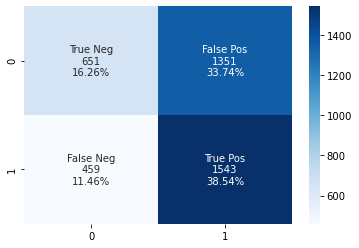

In [266]:
y_pred_pca = resultpca.predict(x_test)
k1=[]
for val in y_pred_pca:
    if(val>=0.5):
        k1.append(1)
    else :
        k1.append(0)        
        
recall1_pca=recall_score(y_balanced3_test,k1)
f1_pca=f1_score(y_balanced3_test,k1)        
print(classification_report(y_balanced3_test,k1)) 
print("F1 Score is",f1_score(y_balanced3_test,k1)) 
cf_mean_pca=confusion_matrix(y_balanced3_test,k1)
conf_plot(cf_mean_pca)


# For KNN  Model

In [239]:
pca_knn = PCA(.95)
pca_knn.fit(knn_imputed_df_balanced)
x_trainsmote3 = pca_knn.transform(knn_imputed_df_balanced)
x_test3= pca_knn.transform(knn_imputed_df_balanced_test)

In [240]:
lr_pca1 = sm.Logit(y_balanced2,x_trainsmote3 )
resultpca1 = lr_pca1.fit_regularized() 
resultpca1.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6452490765128714
            Iterations: 203
            Function evaluations: 209
            Gradient evaluations: 203


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.069      
Dependent Variable: class            AIC:              20711.4564 
Date:               2021-04-17 00:43 BIC:              20895.8027 
No. Observations:   16012            Log-Likelihood:   -10332.    
Df Model:           23               LL-Null:          -11099.    
Df Residuals:       15988            LLR p-value:      1.3827e-310
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     203.0000                                      
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1         1.0019     0.0950    10.5461   0.0000    0.8157    1.1881
x2        -0.7332     0.1145    -6.4025   0.0000   -0.9576   -0.5087
x3        -0.2679     0.0394    -6.8023   0.0000   -0.3450   -0.1907
x4        -0.3323     0.1028    -3.2337   0.0012   -0.5337   -0.1309
x5        -0.1081     0.0285    -3.7897   0.0002   -0.1639   -0.0522
x6        -0.7966     0.1261    -6.3191   0.0000   -1.0437   -0.5495
x7        -5.7153     1.0861    -5.2620   0.0000   -7.8441   -3.5865
x8         0.9747     0.1600     6.0911   0.0000    0.6611    1.2883
x9        -0.0853     0.0238    -3.5862   0.0003   -0.1319   -0.0387
x10       -0.4330     0.1486    -2.9143   0.0036   -0.7241   -0.1418
x11       -0.0671     0.0406    -1.6530   0.0983   -0.1467    0.0125
x12       -0.4921     0.3092    -1.5915   0.1115   -1.0981    0.1139
x13       -0.3038     0.2019    -1.5049   0.1324   -0.6994    0.0919
x14        0.2173     0.3607     0.6025   0.5468   -0.4897    0.9244
x15       -0.1666     0.1343    -1.2403   0.2149   -0.4298    0.0967
x16        0.1084     0.0882     1.2289   0.2191   -0.0645    0.2814
x17       -3.0771     0.8790    -3.5005   0.0005   -4.8000   -1.3542
x18       -0.7635     0.2160    -3.5341   0.0004   -1.1869   -0.3401
x19       -5.0418     1.2950    -3.8933   0.0001   -7.5799   -2.5037
x20        0.6120     1.7531     0.3491   0.7270   -2.8241    4.0481
x21        1.5259     0.2579     5.9167   0.0000    1.0204    2.0314
x22       -0.5299     0.2758    -1.9213   0.0547   -1.0705    0.0107
x23        0.2498     0.2199     1.1358   0.2560   -0.1812    0.6808
x24       -2.1298     0.1684   -12.6448   0.0000   -2.4600   -1.7997
==================================================================

"""

              precision    recall  f1-score   support

         0.0       0.68      0.43      0.53      2002
         1.0       0.58      0.79      0.67      2002

    accuracy                           0.61      4004
   macro avg       0.63      0.61      0.60      4004
weighted avg       0.63      0.61      0.60      4004

F1 Score is 0.6718882303132937


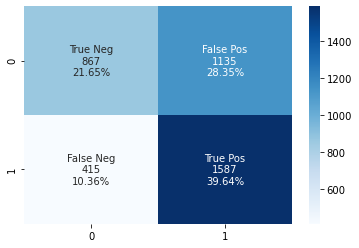

In [265]:
y_pred_pca1 = resultpca1.predict(x_test3)
k2=[]
for val in y_pred_pca1:
    if(val>=0.5):
        k2.append(1)
    else :
        k2.append(0)        
        
recall2_pca=recall_score(y_balanced2_test,k2)
f2_pca=f1_score(y_balanced2_test,k2)        
print(classification_report(y_balanced2_test,k2)) 
print("F1 Score is",f1_score(y_balanced2_test,k2)) 
cf_knn_pca=confusion_matrix(y_balanced2_test,k2)
conf_plot(cf_knn_pca)

# For MICE Model

In [39]:
import statsmodels.api as sm
pca_mice = PCA(.99)
pca_mice.fit(mice_imputed_df_balanced)
x_trainsmote1 = pca_mice.transform(mice_imputed_df_balanced)
x_test1= pca_mice.transform(mice_imputed_df_balanced_test)

In [40]:
lr_pca2 = sm.Logit(y_balanced1,x_trainsmote1)
resultpca2 = lr_pca2.fit_regularized() 
resultpca2.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6611207495474264
            Iterations: 76
            Function evaluations: 80
            Gradient evaluations: 76


P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.046      
Dependent Variable: class            AIC:              21197.7309 
Date:               2021-04-17 15:35 BIC:              21297.5851 
No. Observations:   16012            Log-Likelihood:   -10586.    
Df Model:           12               LL-Null:          -11099.    
Df Residuals:       15999            LLR p-value:      5.8276e-212
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     76.0000                                       
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        -0.0198     0.0214    -0.9248   0.3551   -0.0618    0.0222
x2         0.6914     0.0822     8.4162   0.0000    0.5304    0.8525
x3        -3.5283     0.4830    -7.3044   0.0000   -4.4751   -2.5816
x4        -0.4083     0.0255   -15.9934   0.0000   -0.4583   -0.3582
x5        -0.6881     0.0432   -15.9472   0.0000   -0.7727   -0.6036
x6        -0.0027     0.0390    -0.0690   0.9450   -0.0791    0.0737
x7        -0.0060     0.0322    -0.1859   0.8525   -0.0690    0.0571
x8        -0.1369     0.0381    -3.5926   0.0003   -0.2115   -0.0622
x9        -0.0088     0.0171    -0.5146   0.6068   -0.0422    0.0247
x10        0.0150     0.0292     0.5141   0.6072   -0.0422    0.0722
x11       -0.0621     0.0700    -0.8872   0.3750   -0.1994    0.0751
x12        0.1449     0.0357     4.0638   0.0000    0.0750    0.2148
x13        0.0169     0.0694     0.2434   0.8077   -0.1191    0.1529
==================================================================

"""

In [41]:
y_pred_pca2 = resultpca2.predict(x_test1)
k3=[]
for val in y_pred_pca2:
    if(val>=0.5):
        k3.append(1)
    else :
        k3.append(0)        
print(classification_report(y_balanced1_test,k3))
recall3_pca=recall_score(y_balanced1_test,k3)
f3_pca=f1_score(y_balanced1_test,k3)
print("F1 Score is",f1_score(y_balanced1_test,k3))

cf_knn_mice=confusion_matrix(y_balanced1_test,k3)
conf_plot(cf_knn_mice)

              precision    recall  f1-score   support

           0       0.68      0.56      0.62      2002
           1       0.63      0.74      0.68      2002

    accuracy                           0.65      4004
   macro avg       0.66      0.65      0.65      4004
weighted avg       0.66      0.65      0.65      4004



NameError: name 'f1_score' is not defined

<ipython-input-285-0f97beaf24d4>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


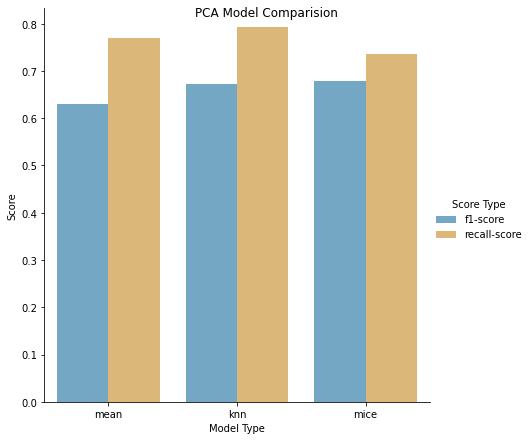

In [285]:

    
barchart(f1_pca,f2_pca,f3_pca,recall1_pca,recall2_pca,recall3_pca,'PCA Model Comparision')    

In [62]:
def barchart(f1,f2,f3,recall1,recall2,recall3,title):    
    data={'f1-score':[f1,f2,f3],'Model Type':['mean','knn','mice'],'recall-score':[recall1,recall2,recall3]}
    s=pd.DataFrame(data)
    s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


    g = sns.catplot(
        data=s, kind="bar",
        x="Model Type", y="f1-score", hue="recall-score",
        ci="sd", palette='colorblind', alpha=.6, height=6,legend_out=True
    )
    g.set_axis_labels("Model Type", "Score")
    g._legend.set_title("Score Type")
    g.fig.suptitle(title)

# Variable Selection- Stepwise Regression

In [53]:

m=[]
for val in y_pred:
    if(val>=0.5):
        m.append(1)
    else :
        m.append(0)

NameError: name 'y_pred' is not defined

In [15]:
#Variable Selection using Stepwise Regression on basis of AIC Criteria in R
variables_mean=['Attr24', 'Attr41', 'Attr63', 'Attr34', 'Attr48', 'Attr36', 
'Attr58', 'Attr61', 'Attr9', 'Attr55', 'Attr52', 'Attr32', 'Attr60', 'Attr29', 
'Attr44', 'Attr64', 'Attr40', 'Attr5', 'Attr37', 'Attr57', 'Attr59']

variables_knn=['Attr24', 'Attr63', 'Attr34', 'Attr52', 'Attr58', 'Attr55', 
'Attr41', 'Attr48', 'Attr36', 'Attr9', 'Attr61', 'Attr60', 'Attr27', 'Attr37', 
'Attr44','Attr40', 'Attr32', 'Attr64', 'Attr29', 'Attr5', 'Attr21', 'Attr8', 
'Attr57', 'Attr59']

variables_mice=['Attr24' , 'Attr41' , 'Attr48' , 'Attr64' , 'Attr34' ,'Attr36' , 
    'Attr61' , 'Attr58' , 'Attr9' , 'Attr55' , 'Attr52' , 'Attr29' ,'Attr31' , 
    'Attr60' , 'Attr45' , 'Attr13' , 'Attr8' , 'Attr5']

In [65]:
Z1 = add_constant(mean_imputed_df_balanced[variables_mean])
y1 = np.array(y_balanced3)

In [70]:
sum(y1)

8046.0

In [ ]:
Z1 = add_constant(Z1[variables_mean])
y1 = np.array(y_balanced3)

Z2 = add_constant(Z2[variables_knn])
y2 = np.array(y_balanced2)

Z3 = add_constant(Z3[variables_mice])
y3 = np.array(y_balanced1)


In [ ]:
from scipy.stats import norm
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(np.array(x))
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    
    return coefs,se,t,p


In [ ]:
def nice_output(model,X):
    coefs,se,t,p=logit_pvalue(model,X)
    output_df=pd.DataFrame()
    Y=add_constant(X)
    output_df['Variables']=list(Y.columns)
    output_df['Coefficients']=coefs
    output_df['Standard Error']=se
    output_df['z']=t
    output_df['P>|z|']=p
    
    return output_df

In [ ]:
import sklearn.metrics as metrics
def llr_full(X, y, model):
    llr_full= -1*metrics.log_loss(y, model.predict_proba(X), normalize=False)
    return llr_full

def llr_null(X, y,c):
    lr = LogisticRegression(C=c,max_iter=5000)
    model=lr.fit(np.array(X['const']).reshape(-1, 1),y)
    llr_null= -1*metrics.log_loss(y, model.predict_proba(np.array(X['const']).reshape(-1, 1)), normalize=False)
    return llr_null

In [14]:
l=pd.read_csv('C:/Users/rick7/Desktop/mean4th.csv')

In [142]:
mean_imputed_df_balanced,y_balanced3=balanced_data(mean_imputed_df_train,ratio=1)
mean_imputed_df_balanced_val,y_balanced3_val=balanced_data(mean_imputed_df_val,ratio=1)
mean_imputed_df_balanced_test,y_balanced3_test=balanced_data(mean_imputed_df_test,ratio=1)

In [143]:
Z1 = add_constant(mean_imputed_df_balanced[variables_mean])
y1 = np.array(y_balanced3)
Z11= add_constant(mean_imputed_df_balanced_val[variables_mean])
y11 = np.array(y_balanced3_val)
Z12 = add_constant(mean_imputed_df_balanced_test[variables_mean])
y12 = np.array(y_balanced3_test)

In [131]:
Z11

,const,Attr24,Attr41,Attr63,Attr34,Attr48,Attr36,Attr58,Attr61,Attr9,...,Attr32,Attr60,Attr29,Attr44,Attr64,Attr40,Attr5,Attr37,Attr57,Attr59
0,1.0,-0.102558,0.093147,-0.156442,-0.048084,-0.038378,-0.377503,-0.024335,-0.118972,-0.332569,...,-0.038331,-0.034005,-0.210991,-0.006792,-0.081689,-0.073583,0.022215,-1.008067e-01,-0.048334,0.898620
1,1.0,0.106172,-0.007868,0.116104,0.023277,0.121159,-0.102173,-0.025850,-0.141961,-0.022515,...,-0.056289,-0.034404,-1.248522,0.027481,-0.053761,-0.036645,0.022817,2.097234e-18,0.040055,-0.060697
2,1.0,-0.246542,-0.027146,-0.134220,-0.029841,-0.160814,0.071467,-0.023904,0.256622,0.173024,...,-0.045336,-0.034250,-0.543034,-0.081728,-0.074942,-0.070717,0.022196,2.097234e-18,-0.040346,-0.060697
3,1.0,0.135955,-0.002883,-0.069431,-0.023305,0.042144,-0.135153,-0.025250,-0.117583,-0.059655,...,-0.050494,-0.032375,0.063140,-0.008277,-0.070953,-0.048975,0.022650,2.097234e-18,0.022894,-0.060697
4,1.0,0.137629,-0.006226,-0.002606,-0.047784,0.154990,0.012357,-0.025608,-0.139622,-0.292657,...,-0.053639,-0.034694,0.271579,0.022867,-0.011166,-0.057394,0.022689,1.093392e+00,0.041986,-0.060570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,1.0,-0.086010,-0.013533,-0.117842,-0.031171,0.053618,0.798725,-0.025095,0.016981,0.978373,...,-0.045473,-0.023946,-0.316074,-0.024645,0.036288,-0.072707,0.022326,-7.538180e-02,0.502715,0.050278
2697,1.0,-0.070935,0.070855,-0.162887,-0.039509,-0.010261,0.008275,-0.027747,-0.151805,0.094435,...,0.014776,-0.032062,1.432930,0.061528,-0.051356,-0.070177,0.022256,2.076636e-02,0.021161,-0.058476
2698,1.0,-0.246937,0.013549,-0.201324,-0.049550,-0.189862,-0.264698,-0.024165,-0.127120,-0.207778,...,0.031076,-0.035105,0.761220,0.003012,-0.074144,-0.073954,0.020946,2.097234e-18,0.170758,-0.060697
2699,1.0,-0.139651,-0.000501,-0.069072,-0.046427,-0.113431,0.376435,-0.024502,0.061048,-0.270682,...,-0.051655,-0.034463,-0.829248,-0.068921,-0.060105,-0.072194,0.022305,-7.260722e-02,-0.002789,-0.051556


# Logisitic Regression Mean Imputation Model after Stepwise Regression 

In [118]:
import statsmodels.api as sm

In [ ]:
Z1.iloc[:,1:]

In [144]:
logistic_regression_mean = sm.Logit(y1, Z1)
result11_regularized = logistic_regression_mean.fit_regularized(alpha=28.06122448979592,method='l1') 
result11 = logistic_regression_mean.fit_regularized()
result11_regularized.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6575213102507772
            Iterations: 133
            Function evaluations: 134
            Gradient evaluations: 133
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6276866662537347
            Iterations: 222
            Function evaluations: 225
            Gradient evaluations: 222


P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                15012
Model:                          Logit   Df Residuals:                    14990
Method:                           MLE   Df Model:                           21
Date:                Thu, 29 Apr 2021   Pseudo R-squ.:                 0.07370
Time:                        05:58:45   Log-Likelihood:                -9638.6
converged:                       True   LL-Null:                       -10406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2441      0.021    -11.890      0.000      -0.284      -0.204
Attr24        -2.5751      0.140    -18.406      0.000      -2.849      -2.301
Attr41        -0.0090      0.025     -0.362      0.717      -0.057       0.040
Attr63        -1.7171      0.155    -11.099      0.000      -2.020      -1.414
Attr34         1.6770      0.169      9.925      0.000       1.346       2.008
Attr48         0.0429      0.035      1.226      0.220      -0.026       0.111
Attr36         0.3487      0.067      5.234      0.000       0.218       0.479
Attr58        -0.0122      0.026     -0.463      0.643      -0.064       0.039
Attr61        -0.1339      0.068     -1.960      0.050      -0.268    7.81e-06
Attr9         -0.8498      0.234     -3.630      0.000      -1.309      -0.391
Attr55        -0.1520      0.041     -3.717      0.000      -0.232      -0.072
Attr52        -0.0338      0.027     -1.264      0.206      -0.086       0.019
Attr32        -0.0045      0.029     -0.155      0.877      -0.062       0.053
Attr60        -0.0143      0.027     -0.522      0.601      -0.068       0.039
Attr29         0.0288      0.021      1.392      0.164      -0.012       0.069
Attr44        -0.0286      0.036     -0.790      0.430      -0.099       0.042
Attr64        -0.0573      0.032     -1.782      0.075      -0.120       0.006
Attr40        -0.0166      0.050     -0.336      0.737      -0.114       0.080
Attr5          0.0248      0.029      0.858      0.391      -0.032       0.082
Attr37        -0.0025      0.035     -0.071      0.944      -0.070       0.065
Attr57        -0.1480      0.065     -2.273      0.023      -0.276      -0.020
Attr59        -0.1493      0.065     -2.285      0.022      -0.277      -0.021
==============================================================================
"""

In [216]:
#Using Sciket Learn
lr_mean = LogisticRegression(max_iter=5000)
result12 = lr_mean.fit(np.array(Z1.iloc[:,1:]),y1) 
y_pred12=result12.predict(mean_imputed_df_balanced_test[variables_mean])
 

In [138]:
alpha=np.linspace(25,50)
f2=[]
for val in alpha:
    logistic_regression_mean = sm.Logit(y1, Z1)
    result11_regularized = logistic_regression_mean.fit_regularized(alpha=val,method='l1') 
    lasso_pred2 = result11_regularized.predict(Z11)
    n2=[]
    for val in lasso_pred2:
        if(val>=0.5):
            n2.append(1)
        else :
            n2.append(0)
            
    f2.append(f1_score(y_balanced3_val,n2)) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.654692517672995
            Iterations: 121
            Function evaluations: 121
            Gradient evaluations: 121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6549962428280528
            Iterations: 121
            Function evaluations: 121
            Gradient evaluations: 121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6552937171339582
            Iterations: 121
            Function evaluations: 121
            Gradient evaluations: 121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6555850095890421
            Iterations: 121
            Function evaluations: 122
            Gradient evaluations: 121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6558701866328502
            Iterations: 121
            

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6631115870469791
            Iterations: 80
            Function evaluations: 80
            Gradient evaluations: 80
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6632733281643419
            Iterations: 80
            Function evaluations: 80
            Gradient evaluations: 80
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6634335058142217
            Iterations: 78
            Function evaluations: 79
            Gradient evaluations: 78
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6635921411039474
            Iterations: 78
            Function evaluations: 78
            Gradient evaluations: 78
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6637492501228998
            Iterations: 78
            Function eva

28.06122448979592

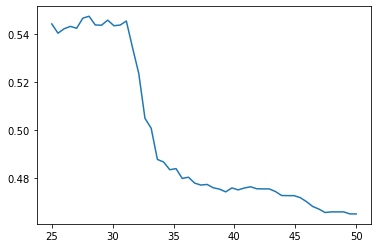

In [139]:
g=sns.lineplot(x=alpha,y=f2)
ymax = max(f2)
xpos = f2.index(ymax)
xmax = alpha[xpos]
xmax

              precision    recall  f1-score   support

         0.0       0.68      0.48      0.56      1001
         1.0       0.60      0.77      0.67      1001

    accuracy                           0.63      2002
   macro avg       0.64      0.63      0.62      2002
weighted avg       0.64      0.63      0.62      2002

F1 Score is 0.6742259049280419


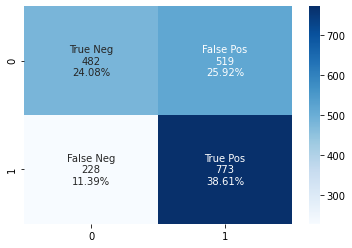

In [149]:
#Using Statsmodels
#Without Regularization
y_pred11 = result11_regularized.predict(Z12)
m1=[]
for val in y_pred11:
    if(val>=0.5):
        m1.append(1)
    else :
        m1.append(0)        
print(classification_report(y_balanced3_test,m1)) 
print("F1 Score is",f1_score(y_balanced3_test,m1)) 
cf_mean=confusion_matrix(y_balanced3_test,m1)

recall1_lr=recall_score(y_balanced3_test,m1)
f1_lr=f1_score(y_balanced3_test,m1)

def conf_plot(cf_matrix):  
  group_names =['True Neg', 'False Pos' , 'False Neg', 'True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    
conf_plot(cf_mean)            
  

In [37]:
def conf_plot(cf_matrix):  
  group_names =['True Neg', 'False Pos' , 'False Neg', 'True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    

              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69      2002
         1.0       0.69      0.75      0.72      2002

    accuracy                           0.70      4004
   macro avg       0.70      0.70      0.70      4004
weighted avg       0.70      0.70      0.70      4004

F1 Score is 0.7156534226902824


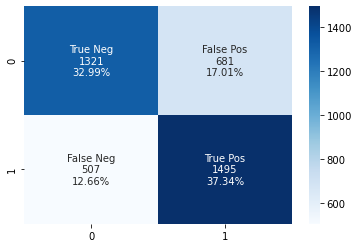

In [389]:
#With L1 Regularization
y_pred11_reg = result11_regularized.predict(add_constant(mean_imputed_df_balanced_test[variables_mean]))
m1=[]
for val in y_pred11_reg:
    if(val>=0.5):
        m1.append(1)
    else :
        m1.append(0)        
print(classification_report(y_balanced3_test,m1)) 
print("F1 Score is",f1_score(y_balanced3_test,m1)) 
cf_mean1=confusion_matrix(y_balanced3_test,m1)

recall1_lr1=recall_score(y_balanced3_test,m1)
f1_lr1=f1_score(y_balanced3_test,m1)
conf_plot(cf_mean1)

# Logisitic Regression KNN Imputation Model after Stepwise Regression 

In [392]:
logistic_regression_knn = sm.Logit(y2,Z2) 
result2_regularized = logistic_regression_knn.fit_regularized(alpha=29,method='l1') 
result2=logistic_regression_knn.fit_regularized()
result2.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6591577972529281
            Iterations: 140
            Function evaluations: 140
            Gradient evaluations: 140
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.644803019423566
            Iterations: 208
            Function evaluations: 210
            Gradient evaluations: 208


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.070     
Dependent Variable: y                AIC:              20699.1719
Date:               2021-04-17 03:11 BIC:              20891.1992
No. Observations:   16012            Log-Likelihood:   -10325.   
Df Model:           24               LL-Null:          -11099.   
Df Residuals:       15987            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     208.0000                                     
------------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const      -1.1706    0.2034   -5.7560  0.0000   -1.5692   -0.7720
Attr24     -3.3970    0.1525  -22.2707  0.0000   -3.6959   -3.0980
Attr63     -0.5975    0.0586  -10.1964  0.0000   -0.7123   -0.4826
Attr34      0.6364    0.0543   11.7125  0.0000    0.5299    0.7429
Attr52    -25.2945    8.8359   -2.8627  0.0042  -42.6126   -7.9763
Attr58     -7.0902    2.3810   -2.9779  0.0029  -11.7568   -2.4236
Attr55     -0.1206    0.0379   -3.1843  0.0015   -0.1949   -0.0464
Attr41    -43.0223   15.4662   -2.7817  0.0054  -73.3355  -12.7092
Attr48      0.1277    0.0667    1.9153  0.0555   -0.0030    0.2584
Attr36      0.5382    0.0635    8.4801  0.0000    0.4138    0.6626
Attr9      -1.2068    0.2103   -5.7396  0.0000   -1.6189   -0.7947
Attr61     -0.4200    0.0964   -4.3556  0.0000   -0.6089   -0.2310
Attr60     -1.5129    0.5201   -2.9092  0.0036   -2.5322   -0.4937
Attr27     -0.6900    0.3034   -2.2739  0.0230   -1.2847   -0.0953
Attr37     -0.2602    0.1337   -1.9454  0.0517   -0.5223    0.0019
Attr44     -0.1599    0.1075   -1.4871  0.1370   -0.3706    0.0508
Attr40      0.1592    0.0596    2.6726  0.0075    0.0425    0.2760
Attr32      3.2527    1.8644    1.7446  0.0811   -0.4015    6.9068
Attr64     -0.0623    0.0337   -1.8513  0.0641   -0.1283    0.0037
Attr29     -0.0462    0.0204   -2.2616  0.0237   -0.0863   -0.0062
Attr5       0.1911    0.1748    1.0937  0.2741   -0.1514    0.5337
Attr21     -0.1938    0.2247   -0.8627  0.3883   -0.6341    0.2465
Attr8      -0.5801    0.4739   -1.2240  0.2210   -1.5090    0.3488
Attr57     -0.5305    0.1427   -3.7186  0.0002   -0.8101   -0.2509
Attr59     -0.5292    0.1451   -3.6465  0.0003   -0.8137   -0.2448
=================================================================

"""

P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


              precision    recall  f1-score   support

         0.0       0.44      0.14      0.22      2002
         1.0       0.49      0.82      0.61      2002

    accuracy                           0.48      4004
   macro avg       0.47      0.48      0.41      4004
weighted avg       0.47      0.48      0.41      4004

F1 Score is 0.6132040283476314


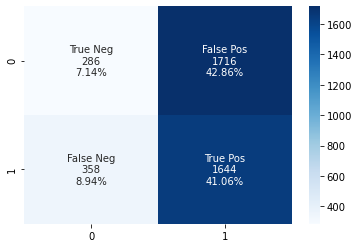

In [402]:
y_pred2 = result2.predict(add_constant(knn_imputed_df_balanced_test[variables_knn]))
m2=[]
for val in y_pred2:
    if(val>=0.5):
        m2.append(1)
    else :
        m2.append(0)
        
recall2_lr=recall_score(y_balanced2_test,m2)
f2_lr=f1_score(y_balanced2_test,m2)        
print(classification_report(np.array(y_balanced2_test),m2))
print("F1 Score is",f1_score(y_balanced2_test,m2)) 
cf_knn=confusion_matrix(y_balanced2_test,m2)
conf_plot(cf_knn)

              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69      2002
         1.0       0.69      0.75      0.72      2002

    accuracy                           0.70      4004
   macro avg       0.70      0.70      0.70      4004
weighted avg       0.70      0.70      0.70      4004

F1 Score is 0.7156534226902824


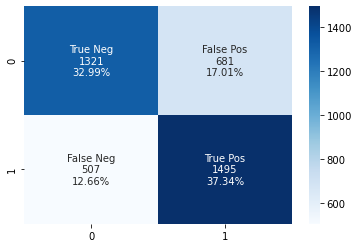

In [394]:
#With L1 Regularization
y_pred12_reg = result2_regularized.predict(add_constant(knn_imputed_df_balanced_test[variables_knn]))
m2=[]
for val in y_pred11_reg:
    if(val>=0.5):
        m2.append(1)
    else :
        m2.append(0)    
        
recall2_lr1=recall_score(y_balanced2_test,m2)
f2_lr1=f1_score(y_balanced2_test,m2)        
print(classification_report(np.array(y_balanced2_test),m2))
print("F1 Score is",f1_score(y_balanced2_test,m2)) 
cf_knn1=confusion_matrix(y_balanced2_test,m2)
conf_plot(cf_knn1)

# Logisitic Regression MICE Imputation Model after Stepwise Regression 

In [395]:
logistic_regression_mice = sm.Logit(y3,add_constant(mice_imputed_df_balanced[variables_mice]))
result3 = logistic_regression_mice.fit_regularized()
result3_regularized=logistic_regression_mice.fit_regularized(alpha=29,method='l1')
result3.summary2()

P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6477901228395612
            Iterations: 194
            Function evaluations: 197
            Gradient evaluations: 194
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6617449788705215
            Iterations: 105
            Function evaluations: 105
            Gradient evaluations: 105


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.065      
Dependent Variable: y                AIC:              20782.8309 
Date:               2021-04-17 03:12 BIC:              20928.7717 
No. Observations:   16012            Log-Likelihood:   -10372.    
Df Model:           18               LL-Null:          -11099.    
Df Residuals:       15993            LLR p-value:      7.5598e-298
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     194.0000                                      
-------------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
const     -2.3372    0.2097  -11.1452  0.0000    -2.7482    -1.9262
Attr24    -3.6171    0.1453  -24.9002  0.0000    -3.9018    -3.3324
Attr41  -139.2764   15.1159   -9.2139  0.0000  -168.9031  -109.6497
Attr48     0.1874    0.0552    3.3922  0.0007     0.0791     0.2957
Attr64    -0.0668    0.0342   -1.9530  0.0508    -0.1339     0.0002
Attr34     0.1447    0.1214    1.1919  0.2333    -0.0933     0.3827
Attr36     0.4564    0.0644    7.0848  0.0000     0.3301     0.5826
Attr61    -0.4834    0.0919   -5.2575  0.0000    -0.6636    -0.3032
Attr58    -2.7945    1.3268   -2.1061  0.0352    -5.3951    -0.1939
Attr9     -1.0908    0.2087   -5.2253  0.0000    -1.4999    -0.6816
Attr55    -0.1879    0.0414   -4.5438  0.0000    -0.2690    -0.1069
Attr52    -5.7795    4.5493   -1.2704  0.2039   -14.6959     3.1368
Attr29    -0.0362    0.0197   -1.8367  0.0662    -0.0749     0.0024
Attr31     8.8137    2.1397    4.1192  0.0000     4.6201    13.0074
Attr60    -0.4055    0.3021   -1.3423  0.1795    -0.9975     0.1866
Attr45     0.0134    0.0488    0.2748  0.7834    -0.0823     0.1091
Attr13   -39.3023    9.6469   -4.0741  0.0000   -58.2098   -20.3947
Attr8     -0.7944    0.4045   -1.9639  0.0495    -1.5872    -0.0016
Attr5      0.1527    0.1553    0.9836  0.3253    -0.1516     0.4571
==================================================================

"""

P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


              precision    recall  f1-score   support

           0       0.47      0.11      0.18      2002
           1       0.50      0.87      0.63      2002

    accuracy                           0.49      4004
   macro avg       0.48      0.49      0.41      4004
weighted avg       0.48      0.49      0.41      4004

F1 Score is 0.6321693504613715


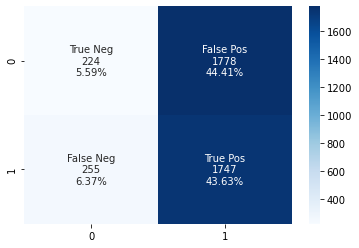

In [398]:
y_pred3 = result3.predict(add_constant(mice_imputed_df_balanced_test[variables_mice]))
m3=[]
for val in y_pred3:
    if(val>=0.5):
        m3.append(1)
    else :
        m3.append(0)
        
recall3_lr=recall_score(y_balanced1_test,m3)
f3_lr=f1_score(y_balanced1_test,m3)        
print(classification_report(np.array(y_balanced1_test),m3))  
print("F1 Score is",f1_score(y_balanced1_test,m3)) 
cf_mice=confusion_matrix(y_balanced1_test,m3)
conf_plot(cf_mice)

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2002
           1       0.67      0.77      0.72      2002

    accuracy                           0.69      4004
   macro avg       0.70      0.69      0.69      4004
weighted avg       0.70      0.69      0.69      4004

F1 Score is 0.715018656716418


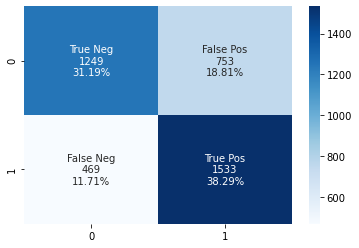

In [396]:
y_pred3_reg = result3_regularized.predict(add_constant(mice_imputed_df_balanced_test[variables_mice]))
m3=[]
for val in y_pred3_reg:
    if(val>=0.5):
        m3.append(1)
    else :
        m3.append(0)
        
recall3_lr1=recall_score(y_balanced1_test,m3)
f3_lr1=f1_score(y_balanced1_test,m3)        
print(classification_report(np.array(y_balanced1_test),m3))  
print("F1 Score is",f1_score(y_balanced1_test,m3)) 
cf_mice1=confusion_matrix(y_balanced1_test,m3)
conf_plot(cf_mice1)

<ipython-input-285-0f97beaf24d4>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


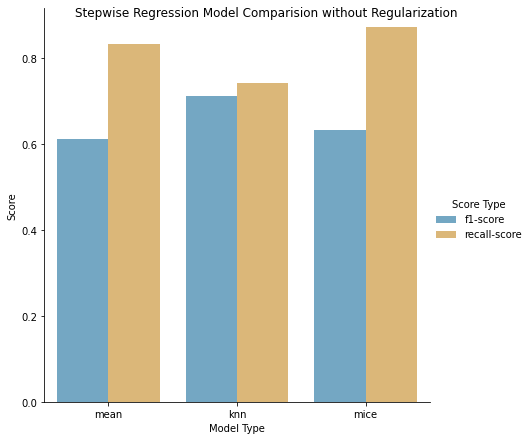

In [399]:
barchart(f1_lr,f2_lr,f3_lr,recall1_lr,recall2_lr,recall3_lr,'Stepwise Regression Model Comparision without Regularization')

<ipython-input-285-0f97beaf24d4>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


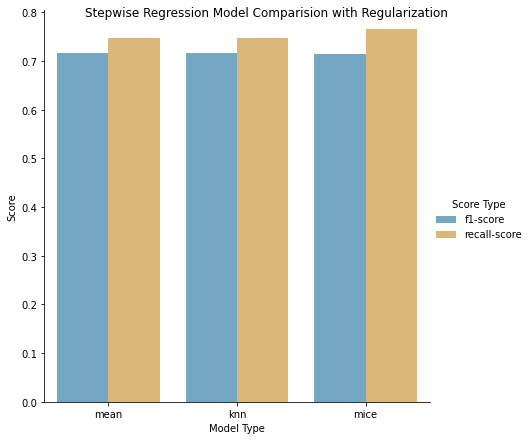

In [400]:
barchart(f1_lr1,f2_lr1,f3_lr1,recall1_lr1,recall2_lr1,recall3_lr1,'Stepwise Regression Model Comparision with Regularization')

#  Variable Selection - Lasso Regression

# For Mean Imputation Model

In [70]:
lasso_regression_mean = sm.Logit(y_balanced3,add_constant(mean_imputed_df_balanced)) 
lasso_results1 = lasso_regression_mean.fit_regularized(alpha=29,method='l1',maxiter=10000) 
lasso_results1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6501616132085724
            Iterations: 240
            Function evaluations: 240
            Gradient evaluations: 240


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                16012
Model:                          Logit   Df Residuals:                    15984
Method:                           MLE   Df Model:                           27
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                 0.08920
Time:                        02:45:53   Log-Likelihood:                -10109.
converged:                       True   LL-Null:                       -11099.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2520      0.021    -12.228      0.000      -0.292      -0.212
Attr1               0        nan        nan        nan         nan         nan
Attr2               0        nan        nan        nan         nan         nan
Attr3               0        nan        nan        nan         nan         nan
Attr4               0        nan        nan        nan         nan         nan
Attr5          0.0149      0.026      0.582      0.561      -0.035       0.065
Attr6               0        nan        nan        nan         nan         nan
Attr7               0        nan        nan        nan         nan         nan
Attr8               0        nan        nan        nan         nan         nan
Attr9               0        nan        nan        nan         nan         nan
Attr10              0        nan        nan        nan         nan         nan
Attr11        -0.1964      0.154     -1.279      0.201      -0.497       0.105
Attr12              0        nan        nan        nan         nan         nan
Attr13              0        nan        nan        nan         nan         nan
Attr14              0        nan        nan        nan         nan         nan
Attr15              0        nan        nan        nan         nan         nan
Attr16              0        nan        nan        nan         nan         nan
Attr17              0        nan        nan        nan         nan         nan
Attr18        -0.0366      0.043     -0.861      0.390      -0.120       0.047
Attr19              0        nan        nan        nan         nan         nan
Attr20              0        nan        nan        nan         nan         nan
Attr21        -0.0129      0.024     -0.540      0.589      -0.060       0.034
Attr22        -1.2400      0.269     -4.609      0.000      -1.767      -0.713
Attr23              0        nan        nan        nan         nan         nan
Attr24        -1.7970      0.157    -11.471      0.000      -2.104      -1.490
Attr25              0        nan        nan        nan         nan         nan
Attr26              0        nan        nan        nan         nan         nan
Attr27              0        nan        nan        nan         nan         nan
Attr28      2.965e-17      0.042   7.12e-16      1.000      -0.082       0.082
Attr29         0.0250      0.020      1.267      0.205      -0.014       0.064
Attr30              0        nan        nan        nan         nan         nan
Attr31         0.0807      0.073      1.109      0.267      -0.062       0.223
Attr32              0        nan        nan        nan         nan         nan
Attr33         0.1599      0.194      0.826      0.409      -0.220       0.539
Attr34         1.0075      0.094     10.765      0.000       0.824       1.191
Attr35        -1.1495      0.120     -9.549      0.000      -1.385      -0.914
Attr36         0.2386      0.034      7.031      0.000       0.172       0.305
Attr37        -0.0074      0.037     -0.201      0.840      -0.079       0.064
At

In [30]:
import sklearn.metrics.f1_score as f1_score
import sklearn.metrics.recall_score as recall_score


ModuleNotFoundError: No module named 'sklearn.metrics.f1_score'

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69      2002
         1.0       0.69      0.78      0.73      2002

    accuracy                           0.71      4004
   macro avg       0.72      0.71      0.71      4004
weighted avg       0.72      0.71      0.71      4004

F1 Score is 0.7300094073377235


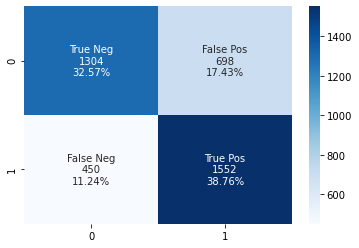

In [69]:
lasso_pred1 = lasso_results1.predict(add_constant(mean_imputed_df_balanced_test))
n1=[]
for val in lasso_pred1:
    if(val>=0.5):
        n1.append(1)
    else :
        n1.append(0)
recall1_lasso=recall_score(y_balanced3_test,n1)
f1_lasso=f1_score(y_balanced3_test,n1)        
print(classification_report(y_balanced3_test,n1))
print("F1 Score is",f1_score(y_balanced3_test,n1)) 
cf_lasso1=confusion_matrix(y_balanced3_test,n1)
conf_plot(cf_lasso1)

## For KNN Imputation Model

In [54]:
lasso_regression_knn = sm.Logit(y_balanced2,add_constant(knn_imputed_df_balanced)) 
lasso_results2 = lasso_regression_knn.fit_regularized(alpha=29,method='l1',maxiter=1000) 
lasso_results2.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6502641213425433
            Iterations: 263
            Function evaluations: 263
            Gradient evaluations: 263


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.089     
Dependent Variable: class            AIC:              20285.9319
Date:               2021-04-28 02:22 BIC:              20516.3648
No. Observations:   16012            Log-Likelihood:   -10113.   
Df Model:           29               LL-Null:          -11099.   
Df Residuals:       15982            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     263.0000                                     
------------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
------------------------------------------------------------------
const       -0.2513    0.0233  -10.7846  0.0000   -0.2969  -0.2056
Attr1        0.0000       nan       nan     nan       nan      nan
Attr2        0.0000       nan       nan     nan       nan      nan
Attr3        0.0000       nan       nan     nan       nan      nan
Attr4        0.0000       nan       nan     nan       nan      nan
Attr5        0.0153    0.0259    0.5932  0.5530   -0.0354   0.0661
Attr6        0.0000       nan       nan     nan       nan      nan
Attr7        0.0000       nan       nan     nan       nan      nan
Attr8       -0.0058   19.9117   -0.0003  0.9998  -39.0320  39.0205
Attr9        0.0000       nan       nan     nan       nan      nan
Attr10       0.0000       nan       nan     nan       nan      nan
Attr11      -0.1867    0.1549   -1.2048  0.2283   -0.4903   0.1170
Attr12       0.0000       nan       nan     nan       nan      nan
Attr13       0.0000       nan       nan     nan       nan      nan
Attr14       0.0000       nan       nan     nan       nan      nan
Attr15       0.0000       nan       nan     nan       nan      nan
Attr16       0.0000       nan       nan     nan       nan      nan
Attr17      -0.0000   20.0658   -0.0000  1.0000  -39.3283  39.3283
Attr18      -0.0377    0.0431   -0.8745  0.3818   -0.1221   0.0467
Attr19       0.0000       nan       nan     nan       nan      nan
Attr20       0.0000       nan       nan     nan       nan      nan
Attr21      -0.0163    0.0254   -0.6407  0.5217   -0.0661   0.0335
Attr22      -1.2840    0.2697   -4.7613  0.0000   -1.8125  -0.7554
Attr23       0.0000       nan       nan     nan       nan      nan
Attr24      -1.8017    0.1574  -11.4456  0.0000   -2.1103  -1.4932
Attr25       0.0000       nan       nan     nan       nan      nan
Attr26       0.0000       nan       nan     nan       nan      nan
Attr27      -0.0736    0.0717   -1.0258  0.3050   -0.2142   0.0670
Attr28       0.0000       nan       nan     nan       nan      nan
Attr29       0.0240    0.0199    1.2071  0.2274   -0.0149   0.0629
Attr30       0.0000       nan       nan     nan       nan      nan
Attr31       0.0902    0.0846    1.0665  0.2862   -0.0756   0.2559
Attr32       0.0000       nan       nan     nan       nan      nan
Attr33       0.0465    0.1745    0.2666  0.7898   -0.2956   0.3886
Attr34       1.0174    0.0870   11.6908  0.0000    0.8468   1.1879
Attr35      -1.1463    0.1196   -9.5874  0.0000   -1.3807  -0.9120
Attr36       0.2463    0.0338    7.2769  0.0000    0.1799   0.3126
Attr37      -0.0228    0.0490   -0.4647  0.6421   -0.1188   0.0732
Attr38      -0.7491    0.2623   -2.8562  0.0043   -1.2631  -0.2350
Attr39       0.0000       nan       nan     nan       nan      nan
Attr40       0.0000       nan       nan     nan       nan      nan
Attr41      -0.0097    0.0239   -0.4062  0.6846   -0.0566   0.0372
Attr42       0.0000       nan       nan     nan       nan      nan
Attr43       0.0000       nan       nan     nan       nan      nan
Attr44       0.0000       nan       nan     nan       nan      nan
Attr45       0.0000       nan       nan     nan       nan      nan
Attr46       0.0000       nan     

In [55]:
# Finding perfect alpha 
alpha=range(1,30)
f2=[]
for val in alpha:
    lasso_regression_knn = sm.Logit(y_balanced2,add_constant(knn_imputed_df_balanced)) 
    lasso_results2 = lasso_regression_knn.fit_regularized(alpha=val,method='l1',maxiter=1000) 
    lasso_pred2 = lasso_results2.predict(add_constant(knn_imputed_df_balanced_test))
    n2=[]
    for val in lasso_pred2:
        if(val>=0.5):
            n2.append(1)
        else :
            n2.append(0)
            
    f2.append(f1_score(y_balanced2_test,n2)) 
    

P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Iteration limit reached    (Exit mode 9)
            Current function value: 0.604591918369656
            Iterations: 1000
            Function evaluations: 1010
            Gradient evaluations: 1000


P:\Anaconda\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 26 out of 65 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
P:\Anaconda\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
P:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.610972710223412
            Iterations: 792
            Function evaluations: 808
            Gradient evaluations: 792


P:\Anaconda\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 65 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
P:\Anaconda\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6146103702664365
            Iterations: 617
            Function evaluations: 619
            Gradient evaluations: 617
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6176523266636811
            Iterations: 539
            Function evaluations: 539
            Gradient evaluations: 539
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6203703840916689
            Iterations: 514
            Function evaluations: 515
            Gradient evaluations: 514
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.622807650690014
            Iterations: 478
            Function evaluations: 480
            Gradient evaluations: 478
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6250200779814516
            Iterations: 479
            

24

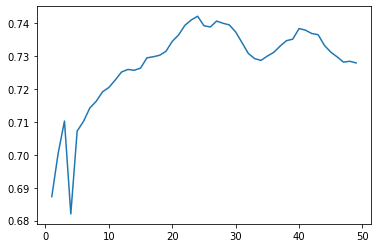

In [56]:
g=sns.lineplot(x=alpha,y=f2)
ymax = max(f2)
xpos = f2.index(ymax)
xmax = alpha[xpos]
xmax


In [57]:
xmax

24

              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68      2002
         1.0       0.68      0.79      0.73      2002

    accuracy                           0.71      4004
   macro avg       0.71      0.71      0.70      4004
weighted avg       0.71      0.71      0.70      4004

F1 Score is 0.727942870306381


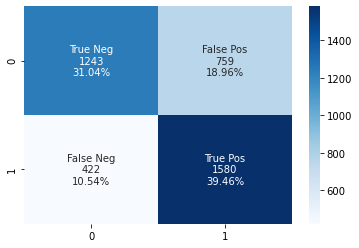

In [58]:
lasso_pred2 = lasso_results2.predict(add_constant(knn_imputed_df_balanced_test))
n2=[]
for val in lasso_pred2:
    if(val>=0.5):
        n2.append(1)
    else :
        n2.append(0)

recall2_lasso=recall_score(y_balanced2_test,n2)
f2_lasso=f1_score(y_balanced2_test,n2)            
print(classification_report(y_balanced2_test,n2))
print("F1 Score is",f1_score(y_balanced3_test,n2)) 
cf_lasso2=confusion_matrix(y_balanced2_test,n2)
conf_plot(cf_lasso2)

# For MICE Impuation Model

In [59]:
lasso_regression_mice = sm.Logit(y_balanced1,add_constant(mice_imputed_df_balanced)) 
lasso_results3 = lasso_regression_mice.fit_regularized(alpha=29,method='l1',maxiter=5000,refit=True) 
lasso_results3.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6498005083438926
            Iterations: 264
            Function evaluations: 264
            Gradient evaluations: 264


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.089     
Dependent Variable: class            AIC:              20272.5163
Date:               2021-04-28 02:28 BIC:              20479.9059
No. Observations:   16012            Log-Likelihood:   -10109.   
Df Model:           26               LL-Null:          -11099.   
Df Residuals:       15985            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     264.0000                                     
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -0.2466     0.0204   -12.0899   0.0000   -0.2866   -0.2066
Attr1     0.0000        nan        nan      nan       nan       nan
Attr2     0.0000        nan        nan      nan       nan       nan
Attr3     0.0000        nan        nan      nan       nan       nan
Attr4     0.0000        nan        nan      nan       nan       nan
Attr5     0.0148     0.0256     0.5795   0.5622   -0.0353    0.0650
Attr6     0.0000        nan        nan      nan       nan       nan
Attr7     0.0000        nan        nan      nan       nan       nan
Attr8     0.0000        nan        nan      nan       nan       nan
Attr9     0.0000        nan        nan      nan       nan       nan
Attr10    0.0000        nan        nan      nan       nan       nan
Attr11   -0.0417     0.1358    -0.3072   0.7587   -0.3078    0.2244
Attr12    0.0000        nan        nan      nan       nan       nan
Attr13    0.0000        nan        nan      nan       nan       nan
Attr14    0.0000        nan        nan      nan       nan       nan
Attr15    0.0000        nan        nan      nan       nan       nan
Attr16    0.0000        nan        nan      nan       nan       nan
Attr17    0.0000        nan        nan      nan       nan       nan
Attr18   -0.0341     0.0407    -0.8384   0.4018   -0.1138    0.0456
Attr19    0.0000        nan        nan      nan       nan       nan
Attr20    0.0000        nan        nan      nan       nan       nan
Attr21   -0.0127     0.0240    -0.5316   0.5950   -0.0597    0.0342
Attr22   -1.3839     0.2652    -5.2175   0.0000   -1.9038   -0.8641
Attr23    0.0000        nan        nan      nan       nan       nan
Attr24   -1.8352     0.1559   -11.7679   0.0000   -2.1409   -1.5295
Attr25    0.0000        nan        nan      nan       nan       nan
Attr26    0.0000        nan        nan      nan       nan       nan
Attr27    0.0000     0.0268     0.0000   1.0000   -0.0526    0.0526
Attr28    0.0000        nan        nan      nan       nan       nan
Attr29    0.0200     0.0198     1.0149   0.3102   -0.0187    0.0588
Attr30    0.0000        nan        nan      nan       nan       nan
Attr31    0.0579     0.0454     1.2768   0.2017   -0.0310    0.1468
Attr32   -0.0139     0.0095    -1.4637   0.1433   -0.0325    0.0047
Attr33    0.0000        nan        nan      nan       nan       nan
Attr34    1.0219     0.1240     8.2430   0.0000    0.7789    1.2649
Attr35   -1.1643     0.1214    -9.5942   0.0000   -1.4022   -0.9265
Attr36    0.2192     0.0335     6.5428   0.0000    0.1535    0.2849
Attr37   -0.0079     0.0374    -0.2123   0.8319   -0.0813    0.0654
Attr38   -0.9167     0.2636    -3.4776   0.0005   -1.4333   -0.4000
Attr39    0.0000        nan        nan      nan       nan       nan
Attr40    0.0000        nan        nan      nan       nan       nan
Attr41   -0.0101     0.0240    -0.4221   0.6729   -0.0571    0.0368
Attr42    0.0000        nan        nan      nan       nan       nan
Attr43    0.0000        nan        nan      nan       nan       nan
Attr44    0.0000        nan        nan      nan       nan       nan
Attr45    0.0000        nan        nan      nan      

In [ ]:
alpha=range(1,50)
f3=[]
for val in alpha:
    lasso_regression_mice = sm.Logit(y_balanced1,add_constant(mice_imputed_df_balanced)) 
    lasso_results3 = lasso_regression_mice.fit_regularized(alpha=val,method='l1',maxiter=5000,refit=True) 
    lasso_pred3 = lasso_results3.predict(add_constant(mice_imputed_df_balanced_test))
    n3=[]
    for val in lasso_pred3:
        if(val>=0.5):
            n3.append(1)
        else :
            n3.append(0)
            
    f3.append(f1_score(y_balanced1_test,n3)) 

In [ ]:
g=sns.lineplot(x=alpha,y=f3)
ymax = max(f)
xpos = f3.index(ymax)
xmax = alpha[xpos]
xmax

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      2002
           1       0.69      0.80      0.74      2002

    accuracy                           0.72      4004
   macro avg       0.73      0.72      0.72      4004
weighted avg       0.73      0.72      0.72      4004

F1 Score is 0.7398978169995355


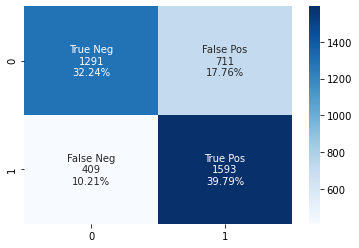

In [60]:
lasso_pred3 = lasso_results3.predict(add_constant(mice_imputed_df_balanced_test))
n3=[]
for val in lasso_pred3:
    if(val>=0.5):
        n3.append(1)
    else :
        n3.append(0)

recall3_lasso=recall_score(y_balanced1_test,n3)
f3_lasso=f1_score(y_balanced1_test,n3)            
print(classification_report(y_balanced1_test,n3)) 
print("F1 Score is",f1_score(y_balanced1_test,n3)) 
cf_lasso3=confusion_matrix(y_balanced1_test,n3)
conf_plot(cf_lasso3)

<ipython-input-62-b0171329096f>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


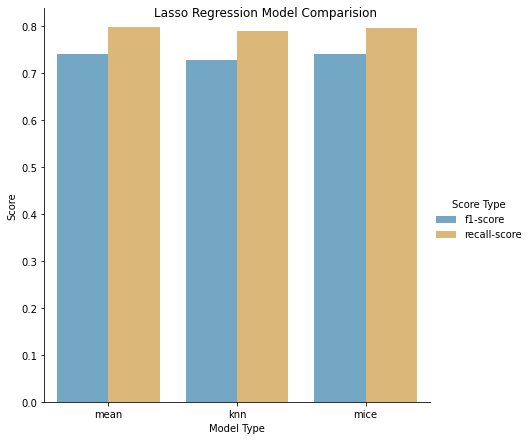

In [63]:
barchart(f1_lasso,f2_lasso,f3_lasso,recall1_lasso,recall2_lasso,recall3_lasso,'Lasso Regression Model Comparision')

# Overall Model Comparision 

<ipython-input-403-47ea7e1c48d2>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


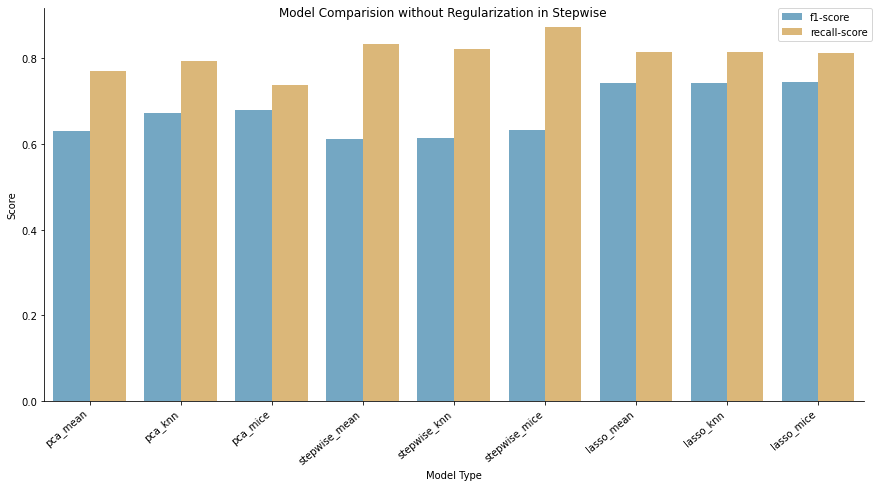

In [403]:
def barchart1(f1,f2,f3,f4,f5,f6,f7,f8,f9,r1,r2,r3,r4,r5,r6,r7,r8,r9,title):    
    data={'f1-score':[f1,f2,f3,f4,f5,f6,f7,f8,f9],'Model Type':['pca_mean','pca_knn','pca_mice','stepwise_mean','stepwise_knn','stepwise_mice','lasso_mean','lasso_knn','lasso_mice'],'recall-score':[r1,r2,r3,r4,r5,r6,r7,r8,r9]}
    s=pd.DataFrame(data)
    s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')
     

    g = sns.catplot(
        data=s, kind="bar",
        x="Model Type", y="f1-score", hue="recall-score",
        ci="sd", palette='colorblind', alpha=.6, height=6,legend=False,aspect=2
    )
    plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
    g.set_xticklabels(rotation=40, ha="right")
   
    g.set_axis_labels("Model Type", "Score")
    g.fig.suptitle(title)
   
barchart1(f1_pca,f2_pca,f3_pca,f1_lr,f2_lr,f3_lr,f1_lasso,f2_lasso,f3_lasso,recall1_pca,recall2_pca,recall3_pca,recall1_lr,recall2_lr,recall3_lr,recall1_lasso,recall2_lasso,recall3_lasso,"Model Comparision without Regularization in Stepwise")

<ipython-input-403-47ea7e1c48d2>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  s = s.melt(id_vars=['Model Type'], var_name='recall-score', value_name='f1-score')


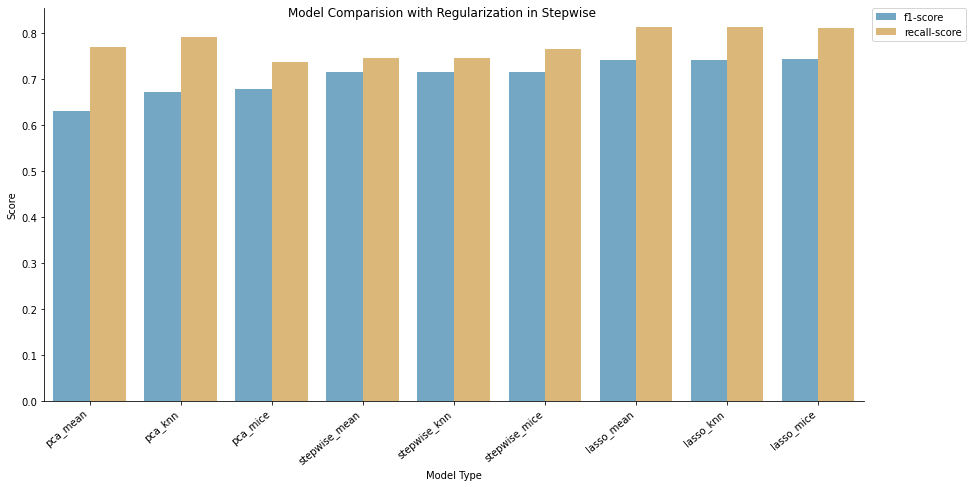

In [404]:
barchart1(f1_pca,f2_pca,f3_pca,f1_lr1,f2_lr1,f3_lr1,f1_lasso,f2_lasso,f3_lasso,recall1_pca,recall2_pca,recall3_pca,recall1_lr1,recall2_lr1,recall3_lr1,recall1_lasso,recall2_lasso,recall3_lasso,"Model Comparision with Regularization in Stepwise")

# Ignore after this. Solve before this

In [168]:
mice_imputed_df_train

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.009136,0.044060,-0.023776,-0.017587,0.012771,0.016023,-0.008635,-0.023416,0.162110,-0.041293,...,0.007313,0.013771,-0.012260,-0.019237,-0.015328,0.320285,-0.025674,-0.169389,-0.046766,0
1,-0.302844,0.158568,-0.101395,-0.018074,0.008621,-0.108234,-0.319247,-0.024173,-0.008267,-0.155736,...,0.105909,0.019472,-0.015106,-0.019237,-0.015352,-0.106095,0.000941,-0.261286,0.111355,0
2,-0.044806,0.069361,-0.009242,-0.017449,0.012753,0.008465,-0.053644,-0.023662,-0.037178,-0.066579,...,0.007620,0.014524,-0.012260,-0.010607,-0.015355,-0.128932,-0.009393,-0.245782,-0.014508,0
3,-0.028218,-0.039600,-0.007837,-0.017196,0.012430,0.016023,-0.045826,-0.021501,-0.130134,0.042322,...,0.010132,0.001210,-0.012396,-0.019237,-0.015389,-0.099410,-0.012731,-0.238080,-0.079589,0
4,-0.104057,0.087673,-0.044439,-0.017763,0.012500,0.016023,-0.121332,-0.023803,-0.006280,-0.084883,...,0.003796,0.044461,-0.012113,-0.020600,-0.015350,-0.115056,-0.009412,-0.245742,-0.029761,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,-0.467961,0.113971,-0.212052,-0.019113,0.026127,-0.065392,-0.475304,-0.023966,-0.153653,-0.111171,...,-0.029915,0.088666,-0.009339,-0.019237,-0.013054,-0.104351,0.059092,-0.287114,-0.081222,0
8398,-0.160663,-0.100980,-0.008610,-0.016012,0.013771,-0.017757,-0.177689,-0.011694,-0.117003,0.073271,...,-0.025945,-0.005377,-0.011241,-0.019237,-0.018137,-0.118041,-0.029267,-0.114989,-0.081171,0
8399,-0.044136,0.062241,-0.050132,-0.018120,0.012186,0.022015,-0.061674,-0.023608,-0.086364,-0.060404,...,0.020624,0.009887,-0.012634,0.038413,-0.015290,-0.112388,-0.008668,-0.247224,-0.080540,0
8400,0.048549,-0.062627,0.053789,-0.014151,0.012897,0.104734,0.060301,-0.019991,-0.132290,0.065337,...,0.073087,-0.001605,-0.014197,-0.017830,-0.015319,-0.098084,-0.024566,-0.180380,-0.078789,0


In [169]:
s=mice_imputed_df_test['class']
o=mice_imputed_df_train['class']

In [191]:
from sklearn.metrics import f1_score
w = {0:1, 1:20}# define model
lg2 = LogisticRegression(random_state=13, class_weight=w,max_iter=5000,penalty='l1',solver='liblinear')
# fit it
mod=lg2.fit(np.array(mice_imputed_df_train.iloc[:,:-1]),np.array(o))
# test
y_pred = lg2.predict(mice_imputed_df_test.iloc[:,:-1])# performance
print(f'Accuracy Score: {accuracy_score(np.array(s),y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(np.array(s), y_pred)}')
print(f1_score(np.array(s),y_pred))
print(f'Recall score: {recall_score(np.array(s),y_pred)}')
print(classification_report(np.array(s),y_pred))


Accuracy Score: 0.2256068538791052
Confusion Matrix: 
[[ 386 1616]
 [  11   88]]
0.0976150859678314
Recall score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.97      0.19      0.32      2002
           1       0.05      0.89      0.10        99

    accuracy                           0.23      2101
   macro avg       0.51      0.54      0.21      2101
weighted avg       0.93      0.23      0.31      2101



In [188]:
nice_output(mod,mice_imputed_df_train)

,Variables,Coefficients,Standard Error,z,P>|z|
0,const,-6.107917,2.966865,-2.058711,0.039522
1,Attr1,-0.010736,5.721712,-0.001876,0.998503
2,Attr2,0.082941,12.493448,0.006639,0.994703
3,Attr3,-0.076265,4.914893,-0.015517,0.987620
4,Attr4,0.019500,32.636825,0.000597,0.999523
...,...,...,...,...,...
61,Attr61,-0.047253,0.499604,-0.094581,0.924647
62,Attr62,-0.018386,2.293202,-0.008018,0.993603
63,Attr63,-0.164678,1.803306,-0.091320,0.927239
64,Attr64,-0.002795,0.384558,-0.007267,0.994202


In [181]:
print(classification_report(np.array(y_balanced1_test),m3)) 

              precision    recall  f1-score   support

           0       0.47      0.11      0.18      2002
           1       0.50      0.87      0.63      2002

    accuracy                           0.49      4004
   macro avg       0.48      0.49      0.41      4004
weighted avg       0.48      0.49      0.41      4004



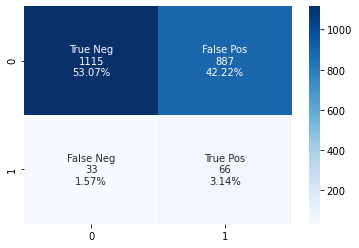

In [179]:
conf_plot(confusion_matrix(np.array(s), y_pred))


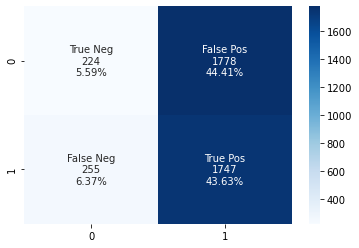

In [180]:
conf_plot(cf_mice)

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [192]:
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]}

In [203]:
# logistic model classifier
lg4 = LogisticRegression(random_state=13,max_iter=5000)# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="f1", cv=10, n_jobs=-1, refit=True)
grid.fit(np.array(mice_imputed_df_train[variables_mice]),np.array(o))
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.09075251120381389 with param: {'class_weight': {0: 1.0, 1: 400}, 'penalty': 'l2'}


In [200]:
col_mice

Index(['Attr5', 'Attr8', 'Attr9', 'Attr13', 'Attr15', 'Attr20', 'Attr21',
       'Attr24', 'Attr27', 'Attr28', 'Attr29', 'Attr31', 'Attr34', 'Attr36',
       'Attr37', 'Attr40', 'Attr41', 'Attr44', 'Attr45', 'Attr48', 'Attr52',
       'Attr55', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr63',
       'Attr64'],
      dtype='object')

In [197]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [232]:
Z3

,const,Attr24,Attr41,Attr48,Attr64,Attr34,Attr36,Attr61,Attr58,Attr9,Attr55,Attr52,Attr29,Attr31,Attr60,Attr45,Attr13,Attr8,Attr5
0,1.0,-0.019507,-0.011140,0.070976,-0.046766,-0.020652,0.440434,0.320285,-0.012260,0.162110,-0.107653,-0.014283,0.098249,0.021003,-0.015328,-0.012383,-0.007094,-0.023416,0.012771
1,1.0,-0.474792,-0.011153,-0.279960,0.105123,-0.065054,-0.082029,-0.106095,-0.015106,-0.008267,-0.110570,-0.012510,-2.266791,0.004498,-0.015352,-0.012619,-0.007295,-0.024173,0.008621
2,1.0,-0.077651,-0.010612,-0.011865,-0.014508,-0.050789,-0.170687,-0.128932,-0.012260,-0.037178,-0.080205,-0.013937,0.461760,0.020842,-0.015355,-0.012402,-0.007098,-0.023662,0.012753
3,1.0,-0.053004,-0.011175,0.019158,-0.079589,-0.048162,-0.455736,-0.099410,-0.012396,-0.130134,-0.095742,-0.014000,0.035529,0.023965,-0.015389,-0.012373,-0.006033,-0.021501,0.012430
4,1.0,-0.149437,-0.013764,-0.071690,-0.029761,-0.048843,-0.075936,-0.115056,-0.012113,-0.006280,-0.119587,-0.013951,-0.147364,0.018285,-0.015350,-0.012455,-0.007545,-0.023803,0.012500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16007,1.0,-0.028509,-0.011196,0.124022,-0.058951,-0.068477,-0.004984,-0.111412,-0.012503,-0.089953,0.340355,-0.014230,1.242899,0.025746,-0.014969,-0.011717,-0.005726,-0.022939,0.013551
16008,1.0,-0.052534,-0.012859,-0.002130,0.400967,-0.003393,0.628315,-0.099774,-0.012209,0.212112,-0.063341,-0.014331,0.030683,0.019458,-0.014216,-0.012407,-0.007441,-0.023190,0.013306
16009,1.0,-0.052082,-0.011222,0.072154,-0.072669,-0.058746,-0.191521,-0.102502,-0.012496,-0.089869,0.259217,-0.014480,0.752891,0.024365,-0.015300,-0.012251,-0.005854,-0.008703,0.014026
16010,1.0,-0.080037,-0.011146,-0.017016,-0.080769,-0.062467,-0.513252,-0.106162,-0.012659,-0.156423,-0.060733,-0.013959,0.809920,0.027438,-0.014875,-0.012101,-0.005166,-0.023189,0.013537


In [239]:
# define model
lg4 = LogisticRegression(random_state=13, penalty='l1',class_weight={0:1, 1: 1} )
# fit it
lg4.fit(X3,y)
# test
y_pred = lg4.predict(add_constant(mice_imputed_df_test[variables_mice]))# performance
print(f'Accuracy Score: {accuracy_score(y1,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y1, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y1, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y1,y_pred)}')
print(f'f1 score: {f1_score(y1,y_pred)}')
print(f'Precision score: {precision_score(y1,y_pred)}')

Accuracy Score:               precision    recall  f1-score   support

         0.0       0.46      0.11      0.18      2002
         1.0       0.49      0.87      0.63      2002

    accuracy                           0.49      4004
   macro avg       0.48      0.49      0.41      4004
weighted avg       0.48      0.49      0.41      4004

Confusion Matrix: 
[[ 223 1779]
 [ 259 1743]]
Recall score: 0.8706293706293706
f1 score: 0.6310644460535844
Precision score: 0.4948892674616695


In [132]:
model4 = sm.Logit(y,X2)

NameError: name 'sm' is not defined

In [95]:
import statsmodels.api as sm

In [414]:
result4 = model4.fit_regularized(method='l1',alpha=0)

P:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Iteration limit reached    (Exit mode 9)
            Current function value: 0.570337605516455
            Iterations: 1000
            Function evaluations: 1137
            Gradient evaluations: 1000


P:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [408]:
y_pred1 = result4.predict(Z)

In [409]:

m1=[]
for val in y_pred1:
    if(val>=0.5):
        m1.append(1)
    else :
        m1.append(0)

In [410]:
print(classification_report(y,m1))

              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72      8006
         1.0       0.71      0.82      0.76      8006

    accuracy                           0.74     16012
   macro avg       0.75      0.74      0.74     16012
weighted avg       0.75      0.74      0.74     16012



In [415]:
result4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.177     
Dependent Variable:    y                  AIC:                18394.4915
Date:                  2021-04-13 02:27   BIC:                18893.7626
No. Observations:      16012              Log-Likelihood:     -9132.2   
Df Model:              64                 LL-Null:            -11099.   
Df Residuals:          15947              LLR p-value:        0.0000    
Converged:             0.0000             Scale:              1.0000    
No. Iterations:        1000.0000                                        
------------------------------------------------------------------------
         Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
------------------------------------------------------------------------
const    -6.2880          nan      nan    nan           nan          nan
Attr1    -2.0108       0.7858  -2.5590 0.0105       -3.5508      -0.4707
Attr2     8.7757       2.7776   3.1594 0.0016        3.3317      14.2197
Attr3    -1.3849       0.5744  -2.4109 0.0159       -2.5107      -0.2590
Attr4    49.7684      18.6072   2.6747 0.0075       13.2989      86.2379
Attr5     0.1509       0.1757   0.8586 0.3905       -0.1935       0.4953
Attr6     0.2143       0.2483   0.8631 0.3881       -0.2724       0.7010
Attr7     7.9120 1747049.0166   0.0000 1.0000 -3424145.2398 3424161.0638
Attr8   -13.1653      26.0517  -0.5054 0.6133      -64.2258      37.8951
Attr9    -2.9062       0.3106  -9.3571 0.0000       -3.5149      -2.2974
Attr10    7.1542       2.7999   2.5552 0.0106        1.6666      12.6418
Attr11   -1.0146       0.3844  -2.6397 0.0083       -1.7679      -0.2613
Attr12   25.4278       3.6664   6.9353 0.0000       18.2418      32.6139
Attr13   -7.6382     184.8223  -0.0413 0.9670     -369.8833     354.6069
Attr14    7.8531 1951053.8468   0.0000 1.0000 -3823987.4185 3824003.1247
Attr15   -0.0611       0.0399  -1.5291 0.1262       -0.1393       0.0172
Attr16  141.6692      16.1473   8.7736 0.0000      110.0211     173.3173
Attr17  -18.6304      29.0757  -0.6408 0.5217      -75.6178      38.3570
Attr18  -17.1633          nan      nan    nan           nan          nan
Attr19 -108.2497      42.7880  -2.5299 0.0114     -192.1127     -24.3868
Attr20   -0.0238    3006.4713  -0.0000 1.0000    -5892.5993    5892.5516
Attr21   -0.0539       0.1015  -0.5310 0.5954       -0.2529       0.1451
Attr22   -6.4461       0.4868 -13.2432 0.0000       -7.4001      -5.4921
Attr23   75.9780      10.4554   7.2669 0.0000       55.4858      96.4702
Attr24   -2.0018       0.1788 -11.1949 0.0000       -2.3523      -1.6513
Attr25   -0.3553       0.4415  -0.8048 0.4209       -1.2205       0.5100
Attr26 -170.8817      15.0803 -11.3314 0.0000     -200.4387    -141.3248
Attr27    0.0041       0.0453   0.0899 0.9284       -0.0848       0.0929
Attr28  -30.8321       4.4454  -6.9356 0.0000      -39.5450     -22.1191
Attr29   -0.0153       0.0255  -0.5983 0.5496       -0.0652       0.0347
Attr30   -1.5752       0.3573  -4.4081 0.0000       -2.2756      -0.8748
Attr31   46.5983       6.9515   6.7034 0.0000       32.9737      60.2229
Attr32    0.9052       2.9772   0.3040 0.7611       -4.9301       6.7405
Attr33   11.1885       0.7915  14.1363 0.0000        9.6372      12.7397
Attr34    5.9254       0.7071   8.3797 0.0000        4.5395       7.3113
Attr35   -0.2347       0.1676  -1.4000 0.1615       -0.5632       0.0939
Attr36    1.0832       0.1020  10.6232 0.0000        0.8834       1.2831
Attr37   -0.4836       0.2180  -2.2187 0.0265       -0.9109      -0.0564
Attr38  -17.8808       1.8369  -9.7344 0.0000      -21.4810     -14.2806
Attr39    0.2774       0.7427   0.3735 0.7088       -1.1783       1.7331
Attr40    3.4578       0.8758   3.9481 0.0001        1.7412       5.1743
Attr41 -191.1649      19.3115  -9.8990

In [349]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X3, y)

LogisticRegression(random_state=0, solver='liblinear')

In [350]:
p_pred = model.predict_proba(X3)
y_pred = model.predict(X3)
score_ = model.score(X3, y)
conf_m = confusion_matrix(y, y_pred)

In [348]:
print(model.param_)

AttributeError: 'LogisticRegression' object has no attribute 'param_'

In [351]:
print(classification_report(y, model.predict(X3)))

              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68      8006
         1.0       0.68      0.79      0.73      8006

    accuracy                           0.71     16012
   macro avg       0.71      0.71      0.70     16012
weighted avg       0.71      0.71      0.70     16012



In [57]:
Z2=np.array(add_constant(df1_train_res))

In [58]:
Z2

array([[ 1.00000000e+00,  9.13637728e-03,  4.40604351e-02, ...,
        -2.56742407e-02, -1.69388740e-01, -4.67664800e-02],
       [ 1.00000000e+00, -3.02844201e-01,  1.58568438e-01, ...,
         9.41009735e-04, -2.61286490e-01,  1.04450289e-01],
       [ 1.00000000e+00, -4.48059907e-02,  6.93614604e-02, ...,
        -9.39296231e-03, -2.45782021e-01, -1.45081613e-02],
       ...,
       [ 1.00000000e+00,  6.14630324e-02, -1.02202244e-01, ...,
        -3.51686031e-02,  2.55546958e-01, -7.26691337e-02],
       [ 1.00000000e+00, -6.03577171e-02,  2.64767971e-02, ...,
        -9.37237552e-03, -2.43126446e-01, -8.07685475e-02],
       [ 1.00000000e+00, -1.52978845e-01,  1.81188709e-02, ...,
        -3.12504421e-02, -5.98029082e-02, -6.19089914e-02]])

In [63]:
model1 = LogisticRegression(solver='liblinear', penalty='l1', random_state=0)
model1.fit(Z2, y)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [64]:
print(classification_report(y, model1.predict(Z2)))

              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      8006
         1.0       0.69      0.79      0.74      8006

    accuracy                           0.72     16012
   macro avg       0.73      0.72      0.72     16012
weighted avg       0.73      0.72      0.72     16012



In [30]:
d=df1_train.dropna()

In [53]:
Z3=np.array(add_constant(knn_imputed_df.iloc[:,:-1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 9126 to 5744
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   3891 non-null   float64
 1   Attr2   3891 non-null   float64
 2   Attr3   3891 non-null   float64
 3   Attr4   3891 non-null   float64
 4   Attr5   3891 non-null   float64
 5   Attr6   3891 non-null   float64
 6   Attr7   3891 non-null   float64
 7   Attr8   3891 non-null   float64
 8   Attr9   3891 non-null   float64
 9   Attr10  3891 non-null   float64
 10  Attr11  3891 non-null   float64
 11  Attr12  3891 non-null   float64
 12  Attr13  3891 non-null   float64
 13  Attr14  3891 non-null   float64
 14  Attr15  3891 non-null   float64
 15  Attr16  3891 non-null   float64
 16  Attr17  3891 non-null   float64
 17  Attr18  3891 non-null   float64
 18  Attr19  3891 non-null   float64
 19  Attr20  3891 non-null   float64
 20  Attr21  3891 non-null   float64
 21  Attr22  3891 non-null   float64
 2

In [56]:
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(Z3, np.array(knn_imputed_df.iloc[:,-1]))

LogisticRegression(random_state=0, solver='liblinear')

In [57]:
print(classification_report(np.array(knn_imputed_df.iloc[:,-1]), model2.predict(Z3)))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      8006
         1.0       0.33      0.01      0.01       396

    accuracy                           0.95      8402
   macro avg       0.64      0.50      0.50      8402
weighted avg       0.92      0.95      0.93      8402



In [58]:
sm = SMOTE(random_state = 3)
e, f = sm.fit_sample(d.iloc[:,:-1], d.iloc[:,-1])

In [38]:
model3 = LogisticRegression(solver='liblinear', penalty='l1', random_state=0)
model3.fit(np.array(add_constant(e)), np.array(f))

P:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [42]:
print(classification_report(np.array(f), model2.predict(np.array(add_constant(e)))))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      3801
           1       0.98      0.05      0.10      3801

    accuracy                           0.52      7602
   macro avg       0.75      0.52      0.39      7602
weighted avg       0.75      0.52      0.39      7602

